# Titanic: Machine Learning from Disaster
### As the official website states, this is a simple prediction training porject for starters of machine learning (ML) and data science (DS). What you need to prepare is some basic Python or R programming. 
### So reciprocally I think it would also be a simple project for me to show some of my experience in the field of ML and Python.
### In the following text, I wil share my way to solve this problem. Hopefully it could behelpful to you!
### NOTE: please refer to https://www.kaggle.com/c/titanic for other information!

# Chapter 1 HOW DOES THE DATA LOOK LIKE?

## It's necessary for anyone who is going to deal with a dataset to get a rough command of the data you will work on. (Of course, you may spend as much time as you would like to so that dig out more details in it. Perhaps the details would be an inspirartion in the following steps.)
## I prefer to look  through them feature by feature. In this way, for one thing I can know how many dimensions I will work on; for the other, since every dimension tells you a different story about data, you may make good use of it.

In [1]:
import warnings
warnings.filterwarnings('ignore')
#This step is unnecessary, though it would make your codes cleaner. 

In [2]:
import pandas as pd
#Pandas ia a popular library used by data scientists and analysts all over the world.
# You can Google "pandas Python" for more information.

In [3]:
train_df=pd.read_csv(r'D:\Desktop\train.csv')
test_df=pd.read_csv(r'D:\Desktop\test.csv')
#Generally, it is a must to obtain data on our own. But this project has already provided us with 3 data files and you can just download them.
#Anyway, it's still of pivot to practice your skills of data acquisition, such as poll, observation and web crawling.

In [4]:
train_df.shape,test_df.shape
#check the dimensions of train set and test set respectively

((891, 12), (418, 11))

In [5]:
import matplotlib.pyplot as plt
#Matplotlib is an important library in data visualization. THis time only its subset pyplot is needed.

In [6]:
print(train_df.columns.values)
#Shows all the features in a list

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [8]:
train_df.head()
#shows top 5 tuples' values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.info()
#fucntion info() tells you what the data type and data structure is like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train_df.isnull().sum()
#This shows how many void values in every column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_df.describe()
#This shows all the basic information of the data features. What you need to learn is what the abbreviation respectively stands by.
#I know it's easy so I skip this part.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0,0.5,'Count')

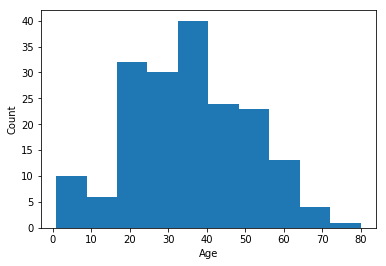

In [12]:
plt.hist(train_df.dropna()['Age'])#Because the null values in "Age" are too many, we have to drop them or otherwise we won't access to what the featue looks like.
plt.xlabel('Age')
plt.ylabel('Count')

Text(0,0.5,'Count')

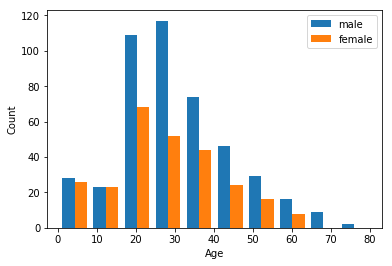

In [13]:
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
plt.legend(['male','female'])
plt.xlabel('Age')
plt.ylabel('Count')
#This shows Surviving Males vs. Surviving Females in each age group

In [14]:
pd.crosstab(train_df['Survived'],train_df['Sex'])
#the most illustrative way to show the relation between survival and sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [15]:
train_df.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [16]:
from pandasql import sqldf
#sqldf is an application of SQL in Python

In [17]:
ql = """
SELECT Survived,Parch,count(*)
FROM train_df
GROUP BY Survived,Parch
"""
sqldf(ql)
#If you have been in touch with SQL, I'm sure you would easily understand these syntax(ps: SELECT, FROM, GROUP)BY are all common controlling orders in SQL
#Oops...I tried but failed to fix this, hopefully somebody tips me.

OperationalError: (sqlite3.OperationalError) too many SQL variables [SQL: 'INSERT INTO train_df ("PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: (1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 7.25, None, 'S', 2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C', 3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.925, None, 'S', 4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S', 5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', 8.05, None, 'S', 6, 0, 3, 'Moran, Mr. James', 'male', None, 0, 0, '330877', 8.4583, None, 'Q', 7, 0, 1, 'McCarthy, Mr. Timothy J', 'male', 54.0, 0, 0, '17463', 51.8625, 'E46', 'S', 8, 0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 21.075, None, 'S', 9, 1, 3, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', 11.1333, None, 'S', 10, 1, 2, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0, 1, 0, '237736', 30.0708, None, 'C', 11, 1, 3, 'Sandstrom, Miss. Marguerite Rut', 'female', 4.0, 1, 1, 'PP 9549', 16.7, 'G6', 'S', 12, 1, 1, 'Bonnell, Miss. Elizabeth', 'female', 58.0, 0, 0, '113783', 26.55, 'C103', 'S', 13, 0, 3, 'Saundercock, Mr. William Henry', 'male', 20.0, 0, 0, 'A/5. 2151', 8.05, None, 'S', 14, 0, 3, 'Andersson, Mr. Anders Johan', 'male', 39.0, 1, 5, '347082', 31.275, None, 'S', 15, 0, 3, 'Vestrom, Miss. Hulda Amanda Adolfina', 'female', 14.0, 0, 0, '350406', 7.8542, None, 'S', 16, 1, 2, 'Hewlett, Mrs. (Mary D Kingcome) ', 'female', 55.0, 0, 0, '248706', 16.0, None, 'S', 17, 0, 3, 'Rice, Master. Eugene', 'male', 2.0, 4, 1, '382652', 29.125, None, 'Q', 18, 1, 2, 'Williams, Mr. Charles Eugene', 'male', None, 0, 0, '244373', 13.0, None, 'S', 19, 0, 3, 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'female', 31.0, 1, 0, '345763', 18.0, None, 'S', 20, 1, 3, 'Masselmani, Mrs. Fatima', 'female', None, 0, 0, '2649', 7.225, None, 'C', 21, 0, 2, 'Fynney, Mr. Joseph J', 'male', 35.0, 0, 0, '239865', 26.0, None, 'S', 22, 1, 2, 'Beesley, Mr. Lawrence', 'male', 34.0, 0, 0, '248698', 13.0, 'D56', 'S', 23, 1, 3, 'McGowan, Miss. Anna "Annie"', 'female', 15.0, 0, 0, '330923', 8.0292, None, 'Q', 24, 1, 1, 'Sloper, Mr. William Thompson', 'male', 28.0, 0, 0, '113788', 35.5, 'A6', 'S', 25, 0, 3, 'Palsson, Miss. Torborg Danira', 'female', 8.0, 3, 1, '349909', 21.075, None, 'S', 26, 1, 3, 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'female', 38.0, 1, 5, '347077', 31.3875, None, 'S', 27, 0, 3, 'Emir, Mr. Farred Chehab', 'male', None, 0, 0, '2631', 7.225, None, 'C', 28, 0, 1, 'Fortune, Mr. Charles Alexander', 'male', 19.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 29, 1, 3, 'O\'Dwyer, Miss. Ellen "Nellie"', 'female', None, 0, 0, '330959', 7.8792, None, 'Q', 30, 0, 3, 'Todoroff, Mr. Lalio', 'male', None, 0, 0, '349216', 7.8958, None, 'S', 31, 0, 1, 'Uruchurtu, Don. Manuel E', 'male', 40.0, 0, 0, 'PC 17601', 27.7208, None, 'C', 32, 1, 1, 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'female', None, 1, 0, 'PC 17569', 146.5208, 'B78', 'C', 33, 1, 3, 'Glynn, Miss. Mary Agatha', 'female', None, 0, 0, '335677', 7.75, None, 'Q', 34, 0, 2, 'Wheadon, Mr. Edward H', 'male', 66.0, 0, 0, 'C.A. 24579', 10.5, None, 'S', 35, 0, 1, 'Meyer, Mr. Edgar Joseph', 'male', 28.0, 1, 0, 'PC 17604', 82.1708, None, 'C', 36, 0, 1, 'Holverson, Mr. Alexander Oskar', 'male', 42.0, 1, 0, '113789', 52.0, None, 'S', 37, 1, 3, 'Mamee, Mr. Hanna', 'male', None, 0, 0, '2677', 7.2292, None, 'C', 38, 0, 3, 'Cann, Mr. Ernest Charles', 'male', 21.0, 0, 0, 'A./5. 2152', 8.05, None, 'S', 39, 0, 3, 'Vander Planke, Miss. Augusta Maria', 'female', 18.0, 2, 0, '345764', 18.0, None, 'S', 40, 1, 3, 'Nicola-Yarred, Miss. Jamila', 'female', 14.0, 1, 0, '2651', 11.2417, None, 'C', 41, 0, 3, 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'female', 40.0, 1, 0, '7546', 9.475, None, 'S', 42, 0, 2, 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)', 'female', 27.0, 1, 0, '11668', 21.0, None, 'S', 43, 0, 3, 'Kraeff, Mr. Theodor', 'male', None, 0, 0, '349253', 7.8958, None, 'C', 44, 1, 2, 'Laroche, Miss. Simonne Marie Anne Andree', 'female', 3.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 45, 1, 3, 'Devaney, Miss. Margaret Delia', 'female', 19.0, 0, 0, '330958', 7.8792, None, 'Q', 46, 0, 3, 'Rogers, Mr. William John', 'male', None, 0, 0, 'S.C./A.4. 23567', 8.05, None, 'S', 47, 0, 3, 'Lennon, Mr. Denis', 'male', None, 1, 0, '370371', 15.5, None, 'Q', 48, 1, 3, "O'Driscoll, Miss. Bridget", 'female', None, 0, 0, '14311', 7.75, None, 'Q', 49, 0, 3, 'Samaan, Mr. Youssef', 'male', None, 2, 0, '2662', 21.6792, None, 'C', 50, 0, 3, 'Arnold-Franchi, Mrs. Josef (Josefine Franchi)', 'female', 18.0, 1, 0, '349237', 17.8, None, 'S', 51, 0, 3, 'Panula, Master. Juha Niilo', 'male', 7.0, 4, 1, '3101295', 39.6875, None, 'S', 52, 0, 3, 'Nosworthy, Mr. Richard Cater', 'male', 21.0, 0, 0, 'A/4. 39886', 7.8, None, 'S', 53, 1, 1, 'Harper, Mrs. Henry Sleeper (Myna Haxtun)', 'female', 49.0, 1, 0, 'PC 17572', 76.7292, 'D33', 'C', 54, 1, 2, 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)', 'female', 29.0, 1, 0, '2926', 26.0, None, 'S', 55, 0, 1, 'Ostby, Mr. Engelhart Cornelius', 'male', 65.0, 0, 1, '113509', 61.9792, 'B30', 'C', 56, 1, 1, 'Woolner, Mr. Hugh', 'male', None, 0, 0, '19947', 35.5, 'C52', 'S', 57, 1, 2, 'Rugg, Miss. Emily', 'female', 21.0, 0, 0, 'C.A. 31026', 10.5, None, 'S', 58, 0, 3, 'Novel, Mr. Mansouer', 'male', 28.5, 0, 0, '2697', 7.2292, None, 'C', 59, 1, 2, 'West, Miss. Constance Mirium', 'female', 5.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 60, 0, 3, 'Goodwin, Master. William Frederick', 'male', 11.0, 5, 2, 'CA 2144', 46.9, None, 'S', 61, 0, 3, 'Sirayanian, Mr. Orsen', 'male', 22.0, 0, 0, '2669', 7.2292, None, 'C', 62, 1, 1, 'Icard, Miss. Amelie', 'female', 38.0, 0, 0, '113572', 80.0, 'B28', None, 63, 0, 1, 'Harris, Mr. Henry Birkhardt', 'male', 45.0, 1, 0, '36973', 83.475, 'C83', 'S', 64, 0, 3, 'Skoog, Master. Harald', 'male', 4.0, 3, 2, '347088', 27.9, None, 'S', 65, 0, 1, 'Stewart, Mr. Albert A', 'male', None, 0, 0, 'PC 17605', 27.7208, None, 'C', 66, 1, 3, 'Moubarek, Master. Gerios', 'male', None, 1, 1, '2661', 15.2458, None, 'C', 67, 1, 2, 'Nye, Mrs. (Elizabeth Ramell)', 'female', 29.0, 0, 0, 'C.A. 29395', 10.5, 'F33', 'S', 68, 0, 3, 'Crease, Mr. Ernest James', 'male', 19.0, 0, 0, 'S.P. 3464', 8.1583, None, 'S', 69, 1, 3, 'Andersson, Miss. Erna Alexandra', 'female', 17.0, 4, 2, '3101281', 7.925, None, 'S', 70, 0, 3, 'Kink, Mr. Vincenz', 'male', 26.0, 2, 0, '315151', 8.6625, None, 'S', 71, 0, 2, 'Jenkin, Mr. Stephen Curnow', 'male', 32.0, 0, 0, 'C.A. 33111', 10.5, None, 'S', 72, 0, 3, 'Goodwin, Miss. Lillian Amy', 'female', 16.0, 5, 2, 'CA 2144', 46.9, None, 'S', 73, 0, 2, 'Hood, Mr. Ambrose Jr', 'male', 21.0, 0, 0, 'S.O.C. 14879', 73.5, None, 'S', 74, 0, 3, 'Chronopoulos, Mr. Apostolos', 'male', 26.0, 1, 0, '2680', 14.4542, None, 'C', 75, 1, 3, 'Bing, Mr. Lee', 'male', 32.0, 0, 0, '1601', 56.4958, None, 'S', 76, 0, 3, 'Moen, Mr. Sigurd Hansen', 'male', 25.0, 0, 0, '348123', 7.65, 'F G73', 'S', 77, 0, 3, 'Staneff, Mr. Ivan', 'male', None, 0, 0, '349208', 7.8958, None, 'S', 78, 0, 3, 'Moutal, Mr. Rahamin Haim', 'male', None, 0, 0, '374746', 8.05, None, 'S', 79, 1, 2, 'Caldwell, Master. Alden Gates', 'male', 0.83, 0, 2, '248738', 29.0, None, 'S', 80, 1, 3, 'Dowdell, Miss. Elizabeth', 'female', 30.0, 0, 0, '364516', 12.475, None, 'S', 81, 0, 3, 'Waelens, Mr. Achille', 'male', 22.0, 0, 0, '345767', 9.0, None, 'S', 82, 1, 3, 'Sheerlinck, Mr. Jan Baptist', 'male', 29.0, 0, 0, '345779', 9.5, None, 'S', 83, 1, 3, 'McDermott, Miss. Brigdet Delia', 'female', None, 0, 0, '330932', 7.7875, None, 'Q', 84, 0, 1, 'Carrau, Mr. Francisco M', 'male', 28.0, 0, 0, '113059', 47.1, None, 'S', 85, 1, 2, 'Ilett, Miss. Bertha', 'female', 17.0, 0, 0, 'SO/C 14885', 10.5, None, 'S', 86, 1, 3, 'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)', 'female', 33.0, 3, 0, '3101278', 15.85, None, 'S', 87, 0, 3, 'Ford, Mr. William Neal', 'male', 16.0, 1, 3, 'W./C. 6608', 34.375, None, 'S', 88, 0, 3, 'Slocovski, Mr. Selman Francis', 'male', None, 0, 0, 'SOTON/OQ 392086', 8.05, None, 'S', 89, 1, 1, 'Fortune, Miss. Mabel Helen', 'female', 23.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 90, 0, 3, 'Celotti, Mr. Francesco', 'male', 24.0, 0, 0, '343275', 8.05, None, 'S', 91, 0, 3, 'Christmann, Mr. Emil', 'male', 29.0, 0, 0, '343276', 8.05, None, 'S', 92, 0, 3, 'Andreasson, Mr. Paul Edvin', 'male', 20.0, 0, 0, '347466', 7.8542, None, 'S', 93, 0, 1, 'Chaffee, Mr. Herbert Fuller', 'male', 46.0, 1, 0, 'W.E.P. 5734', 61.175, 'E31', 'S', 94, 0, 3, 'Dean, Mr. Bertram Frank', 'male', 26.0, 1, 2, 'C.A. 2315', 20.575, None, 'S', 95, 0, 3, 'Coxon, Mr. Daniel', 'male', 59.0, 0, 0, '364500', 7.25, None, 'S', 96, 0, 3, 'Shorney, Mr. Charles Joseph', 'male', None, 0, 0, '374910', 8.05, None, 'S', 97, 0, 1, 'Goldschmidt, Mr. George B', 'male', 71.0, 0, 0, 'PC 17754', 34.6542, 'A5', 'C', 98, 1, 1, 'Greenfield, Mr. William Bertram', 'male', 23.0, 0, 1, 'PC 17759', 63.3583, 'D10 D12', 'C', 99, 1, 2, 'Doling, Mrs. John T (Ada Julia Bone)', 'female', 34.0, 0, 1, '231919', 23.0, None, 'S', 100, 0, 2, 'Kantor, Mr. Sinai', 'male', 34.0, 1, 0, '244367', 26.0, None, 'S', 101, 0, 3, 'Petranec, Miss. Matilda', 'female', 28.0, 0, 0, '349245', 7.8958, None, 'S', 102, 0, 3, 'Petroff, Mr. Pastcho ("Pentcho")', 'male', None, 0, 0, '349215', 7.8958, None, 'S', 103, 0, 1, 'White, Mr. Richard Frasar', 'male', 21.0, 0, 1, '35281', 77.2875, 'D26', 'S', 104, 0, 3, 'Johansson, Mr. Gustaf Joel', 'male', 33.0, 0, 0, '7540', 8.6542, None, 'S', 105, 0, 3, 'Gustafsson, Mr. Anders Vilhelm', 'male', 37.0, 2, 0, '3101276', 7.925, None, 'S', 106, 0, 3, 'Mionoff, Mr. Stoytcho', 'male', 28.0, 0, 0, '349207', 7.8958, None, 'S', 107, 1, 3, 'Salkjelsvik, Miss. Anna Kristine', 'female', 21.0, 0, 0, '343120', 7.65, None, 'S', 108, 1, 3, 'Moss, Mr. Albert Johan', 'male', None, 0, 0, '312991', 7.775, None, 'S', 109, 0, 3, 'Rekic, Mr. Tido', 'male', 38.0, 0, 0, '349249', 7.8958, None, 'S', 110, 1, 3, 'Moran, Miss. Bertha', 'female', None, 1, 0, '371110', 24.15, None, 'Q', 111, 0, 1, 'Porter, Mr. Walter Chamberlain', 'male', 47.0, 0, 0, '110465', 52.0, 'C110', 'S', 112, 0, 3, 'Zabour, Miss. Hileni', 'female', 14.5, 1, 0, '2665', 14.4542, None, 'C', 113, 0, 3, 'Barton, Mr. David John', 'male', 22.0, 0, 0, '324669', 8.05, None, 'S', 114, 0, 3, 'Jussila, Miss. Katriina', 'female', 20.0, 1, 0, '4136', 9.825, None, 'S', 115, 0, 3, 'Attalah, Miss. Malake', 'female', 17.0, 0, 0, '2627', 14.4583, None, 'C', 116, 0, 3, 'Pekoniemi, Mr. Edvard', 'male', 21.0, 0, 0, 'STON/O 2. 3101294', 7.925, None, 'S', 117, 0, 3, 'Connors, Mr. Patrick', 'male', 70.5, 0, 0, '370369', 7.75, None, 'Q', 118, 0, 2, 'Turpin, Mr. William John Robert', 'male', 29.0, 1, 0, '11668', 21.0, None, 'S', 119, 0, 1, 'Baxter, Mr. Quigg Edmond', 'male', 24.0, 0, 1, 'PC 17558', 247.5208, 'B58 B60', 'C', 120, 0, 3, 'Andersson, Miss. Ellis Anna Maria', 'female', 2.0, 4, 2, '347082', 31.275, None, 'S', 121, 0, 2, 'Hickman, Mr. Stanley George', 'male', 21.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 122, 0, 3, 'Moore, Mr. Leonard Charles', 'male', None, 0, 0, 'A4. 54510', 8.05, None, 'S', 123, 0, 2, 'Nasser, Mr. Nicholas', 'male', 32.5, 1, 0, '237736', 30.0708, None, 'C', 124, 1, 2, 'Webber, Miss. Susan', 'female', 32.5, 0, 0, '27267', 13.0, 'E101', 'S', 125, 0, 1, 'White, Mr. Percival Wayland', 'male', 54.0, 0, 1, '35281', 77.2875, 'D26', 'S', 126, 1, 3, 'Nicola-Yarred, Master. Elias', 'male', 12.0, 1, 0, '2651', 11.2417, None, 'C', 127, 0, 3, 'McMahon, Mr. Martin', 'male', None, 0, 0, '370372', 7.75, None, 'Q', 128, 1, 3, 'Madsen, Mr. Fridtjof Arne', 'male', 24.0, 0, 0, 'C 17369', 7.1417, None, 'S', 129, 1, 3, 'Peter, Miss. Anna', 'female', None, 1, 1, '2668', 22.3583, 'F E69', 'C', 130, 0, 3, 'Ekstrom, Mr. Johan', 'male', 45.0, 0, 0, '347061', 6.975, None, 'S', 131, 0, 3, 'Drazenoic, Mr. Jozef', 'male', 33.0, 0, 0, '349241', 7.8958, None, 'C', 132, 0, 3, 'Coelho, Mr. Domingos Fernandeo', 'male', 20.0, 0, 0, 'SOTON/O.Q. 3101307', 7.05, None, 'S', 133, 0, 3, 'Robins, Mrs. Alexander A (Grace Charity Laury)', 'female', 47.0, 1, 0, 'A/5. 3337', 14.5, None, 'S', 134, 1, 2, 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)', 'female', 29.0, 1, 0, '228414', 26.0, None, 'S', 135, 0, 2, 'Sobey, Mr. Samuel James Hayden', 'male', 25.0, 0, 0, 'C.A. 29178', 13.0, None, 'S', 136, 0, 2, 'Richard, Mr. Emile', 'male', 23.0, 0, 0, 'SC/PARIS 2133', 15.0458, None, 'C', 137, 1, 1, 'Newsom, Miss. Helen Monypeny', 'female', 19.0, 0, 2, '11752', 26.2833, 'D47', 'S', 138, 0, 1, 'Futrelle, Mr. Jacques Heath', 'male', 37.0, 1, 0, '113803', 53.1, 'C123', 'S', 139, 0, 3, 'Osen, Mr. Olaf Elon', 'male', 16.0, 0, 0, '7534', 9.2167, None, 'S', 140, 0, 1, 'Giglio, Mr. Victor', 'male', 24.0, 0, 0, 'PC 17593', 79.2, 'B86', 'C', 141, 0, 3, 'Boulos, Mrs. Joseph (Sultana)', 'female', None, 0, 2, '2678', 15.2458, None, 'C', 142, 1, 3, 'Nysten, Miss. Anna Sofia', 'female', 22.0, 0, 0, '347081', 7.75, None, 'S', 143, 1, 3, 'Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)', 'female', 24.0, 1, 0, 'STON/O2. 3101279', 15.85, None, 'S', 144, 0, 3, 'Burke, Mr. Jeremiah', 'male', 19.0, 0, 0, '365222', 6.75, None, 'Q', 145, 0, 2, 'Andrew, Mr. Edgardo Samuel', 'male', 18.0, 0, 0, '231945', 11.5, None, 'S', 146, 0, 2, 'Nicholls, Mr. Joseph Charles', 'male', 19.0, 1, 1, 'C.A. 33112', 36.75, None, 'S', 147, 1, 3, 'Andersson, Mr. August Edvard ("Wennerstrom")', 'male', 27.0, 0, 0, '350043', 7.7958, None, 'S', 148, 0, 3, 'Ford, Miss. Robina Maggie "Ruby"', 'female', 9.0, 2, 2, 'W./C. 6608', 34.375, None, 'S', 149, 0, 2, 'Navratil, Mr. Michel ("Louis M Hoffman")', 'male', 36.5, 0, 2, '230080', 26.0, 'F2', 'S', 150, 0, 2, 'Byles, Rev. Thomas Roussel Davids', 'male', 42.0, 0, 0, '244310', 13.0, None, 'S', 151, 0, 2, 'Bateman, Rev. Robert James', 'male', 51.0, 0, 0, 'S.O.P. 1166', 12.525, None, 'S', 152, 1, 1, 'Pears, Mrs. Thomas (Edith Wearne)', 'female', 22.0, 1, 0, '113776', 66.6, 'C2', 'S', 153, 0, 3, 'Meo, Mr. Alfonzo', 'male', 55.5, 0, 0, 'A.5. 11206', 8.05, None, 'S', 154, 0, 3, 'van Billiard, Mr. Austin Blyler', 'male', 40.5, 0, 2, 'A/5. 851', 14.5, None, 'S', 155, 0, 3, 'Olsen, Mr. Ole Martin', 'male', None, 0, 0, 'Fa 265302', 7.3125, None, 'S', 156, 0, 1, 'Williams, Mr. Charles Duane', 'male', 51.0, 0, 1, 'PC 17597', 61.3792, None, 'C', 157, 1, 3, 'Gilnagh, Miss. Katherine "Katie"', 'female', 16.0, 0, 0, '35851', 7.7333, None, 'Q', 158, 0, 3, 'Corn, Mr. Harry', 'male', 30.0, 0, 0, 'SOTON/OQ 392090', 8.05, None, 'S', 159, 0, 3, 'Smiljanic, Mr. Mile', 'male', None, 0, 0, '315037', 8.6625, None, 'S', 160, 0, 3, 'Sage, Master. Thomas Henry', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 161, 0, 3, 'Cribb, Mr. John Hatfield', 'male', 44.0, 0, 1, '371362', 16.1, None, 'S', 162, 1, 2, 'Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)', 'female', 40.0, 0, 0, 'C.A. 33595', 15.75, None, 'S', 163, 0, 3, 'Bengtsson, Mr. John Viktor', 'male', 26.0, 0, 0, '347068', 7.775, None, 'S', 164, 0, 3, 'Calic, Mr. Jovo', 'male', 17.0, 0, 0, '315093', 8.6625, None, 'S', 165, 0, 3, 'Panula, Master. Eino Viljami', 'male', 1.0, 4, 1, '3101295', 39.6875, None, 'S', 166, 1, 3, 'Goldsmith, Master. Frank John William "Frankie"', 'male', 9.0, 0, 2, '363291', 20.525, None, 'S', 167, 1, 1, 'Chibnall, Mrs. (Edith Martha Bowerman)', 'female', None, 0, 1, '113505', 55.0, 'E33', 'S', 168, 0, 3, 'Skoog, Mrs. William (Anna Bernhardina Karlsson)', 'female', 45.0, 1, 4, '347088', 27.9, None, 'S', 169, 0, 1, 'Baumann, Mr. John D', 'male', None, 0, 0, 'PC 17318', 25.925, None, 'S', 170, 0, 3, 'Ling, Mr. Lee', 'male', 28.0, 0, 0, '1601', 56.4958, None, 'S', 171, 0, 1, 'Van der hoef, Mr. Wyckoff', 'male', 61.0, 0, 0, '111240', 33.5, 'B19', 'S', 172, 0, 3, 'Rice, Master. Arthur', 'male', 4.0, 4, 1, '382652', 29.125, None, 'Q', 173, 1, 3, 'Johnson, Miss. Eleanor Ileen', 'female', 1.0, 1, 1, '347742', 11.1333, None, 'S', 174, 0, 3, 'Sivola, Mr. Antti Wilhelm', 'male', 21.0, 0, 0, 'STON/O 2. 3101280', 7.925, None, 'S', 175, 0, 1, 'Smith, Mr. James Clinch', 'male', 56.0, 0, 0, '17764', 30.6958, 'A7', 'C', 176, 0, 3, 'Klasen, Mr. Klas Albin', 'male', 18.0, 1, 1, '350404', 7.8542, None, 'S', 177, 0, 3, 'Lefebre, Master. Henry Forbes', 'male', None, 3, 1, '4133', 25.4667, None, 'S', 178, 0, 1, 'Isham, Miss. Ann Elizabeth', 'female', 50.0, 0, 0, 'PC 17595', 28.7125, 'C49', 'C', 179, 0, 2, 'Hale, Mr. Reginald', 'male', 30.0, 0, 0, '250653', 13.0, None, 'S', 180, 0, 3, 'Leonard, Mr. Lionel', 'male', 36.0, 0, 0, 'LINE', 0.0, None, 'S', 181, 0, 3, 'Sage, Miss. Constance Gladys', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 182, 0, 2, 'Pernot, Mr. Rene', 'male', None, 0, 0, 'SC/PARIS 2131', 15.05, None, 'C', 183, 0, 3, 'Asplund, Master. Clarence Gustaf Hugo', 'male', 9.0, 4, 2, '347077', 31.3875, None, 'S', 184, 1, 2, 'Becker, Master. Richard F', 'male', 1.0, 2, 1, '230136', 39.0, 'F4', 'S', 185, 1, 3, 'Kink-Heilmann, Miss. Luise Gretchen', 'female', 4.0, 0, 2, '315153', 22.025, None, 'S', 186, 0, 1, 'Rood, Mr. Hugh Roscoe', 'male', None, 0, 0, '113767', 50.0, 'A32', 'S', 187, 1, 3, 'O\'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)', 'female', None, 1, 0, '370365', 15.5, None, 'Q', 188, 1, 1, 'Romaine, Mr. Charles Hallace ("Mr C Rolmane")', 'male', 45.0, 0, 0, '111428', 26.55, None, 'S', 189, 0, 3, 'Bourke, Mr. John', 'male', 40.0, 1, 1, '364849', 15.5, None, 'Q', 190, 0, 3, 'Turcin, Mr. Stjepan', 'male', 36.0, 0, 0, '349247', 7.8958, None, 'S', 191, 1, 2, 'Pinsky, Mrs. (Rosa)', 'female', 32.0, 0, 0, '234604', 13.0, None, 'S', 192, 0, 2, 'Carbines, Mr. William', 'male', 19.0, 0, 0, '28424', 13.0, None, 'S', 193, 1, 3, 'Andersen-Jensen, Miss. Carla Christine Nielsine', 'female', 19.0, 1, 0, '350046', 7.8542, None, 'S', 194, 1, 2, 'Navratil, Master. Michel M', 'male', 3.0, 1, 1, '230080', 26.0, 'F2', 'S', 195, 1, 1, 'Brown, Mrs. James Joseph (Margaret Tobin)', 'female', 44.0, 0, 0, 'PC 17610', 27.7208, 'B4', 'C', 196, 1, 1, 'Lurette, Miss. Elise', 'female', 58.0, 0, 0, 'PC 17569', 146.5208, 'B80', 'C', 197, 0, 3, 'Mernagh, Mr. Robert', 'male', None, 0, 0, '368703', 7.75, None, 'Q', 198, 0, 3, 'Olsen, Mr. Karl Siegwart Andreas', 'male', 42.0, 0, 1, '4579', 8.4042, None, 'S', 199, 1, 3, 'Madigan, Miss. Margaret "Maggie"', 'female', None, 0, 0, '370370', 7.75, None, 'Q', 200, 0, 2, 'Yrois, Miss. Henriette ("Mrs Harbeck")', 'female', 24.0, 0, 0, '248747', 13.0, None, 'S', 201, 0, 3, 'Vande Walle, Mr. Nestor Cyriel', 'male', 28.0, 0, 0, '345770', 9.5, None, 'S', 202, 0, 3, 'Sage, Mr. Frederick', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 203, 0, 3, 'Johanson, Mr. Jakob Alfred', 'male', 34.0, 0, 0, '3101264', 6.4958, None, 'S', 204, 0, 3, 'Youseff, Mr. Gerious', 'male', 45.5, 0, 0, '2628', 7.225, None, 'C', 205, 1, 3, 'Cohen, Mr. Gurshon "Gus"', 'male', 18.0, 0, 0, 'A/5 3540', 8.05, None, 'S', 206, 0, 3, 'Strom, Miss. Telma Matilda', 'female', 2.0, 0, 1, '347054', 10.4625, 'G6', 'S', 207, 0, 3, 'Backstrom, Mr. Karl Alfred', 'male', 32.0, 1, 0, '3101278', 15.85, None, 'S', 208, 1, 3, 'Albimona, Mr. Nassef Cassem', 'male', 26.0, 0, 0, '2699', 18.7875, None, 'C', 209, 1, 3, 'Carr, Miss. Helen "Ellen"', 'female', 16.0, 0, 0, '367231', 7.75, None, 'Q', 210, 1, 1, 'Blank, Mr. Henry', 'male', 40.0, 0, 0, '112277', 31.0, 'A31', 'C', 211, 0, 3, 'Ali, Mr. Ahmed', 'male', 24.0, 0, 0, 'SOTON/O.Q. 3101311', 7.05, None, 'S', 212, 1, 2, 'Cameron, Miss. Clear Annie', 'female', 35.0, 0, 0, 'F.C.C. 13528', 21.0, None, 'S', 213, 0, 3, 'Perkin, Mr. John Henry', 'male', 22.0, 0, 0, 'A/5 21174', 7.25, None, 'S', 214, 0, 2, 'Givard, Mr. Hans Kristensen', 'male', 30.0, 0, 0, '250646', 13.0, None, 'S', 215, 0, 3, 'Kiernan, Mr. Philip', 'male', None, 1, 0, '367229', 7.75, None, 'Q', 216, 1, 1, 'Newell, Miss. Madeleine', 'female', 31.0, 1, 0, '35273', 113.275, 'D36', 'C', 217, 1, 3, 'Honkanen, Miss. Eliina', 'female', 27.0, 0, 0, 'STON/O2. 3101283', 7.925, None, 'S', 218, 0, 2, 'Jacobsohn, Mr. Sidney Samuel', 'male', 42.0, 1, 0, '243847', 27.0, None, 'S', 219, 1, 1, 'Bazzani, Miss. Albina', 'female', 32.0, 0, 0, '11813', 76.2917, 'D15', 'C', 220, 0, 2, 'Harris, Mr. Walter', 'male', 30.0, 0, 0, 'W/C 14208', 10.5, None, 'S', 221, 1, 3, 'Sunderland, Mr. Victor Francis', 'male', 16.0, 0, 0, 'SOTON/OQ 392089', 8.05, None, 'S', 222, 0, 2, 'Bracken, Mr. James H', 'male', 27.0, 0, 0, '220367', 13.0, None, 'S', 223, 0, 3, 'Green, Mr. George Henry', 'male', 51.0, 0, 0, '21440', 8.05, None, 'S', 224, 0, 3, 'Nenkoff, Mr. Christo', 'male', None, 0, 0, '349234', 7.8958, None, 'S', 225, 1, 1, 'Hoyt, Mr. Frederick Maxfield', 'male', 38.0, 1, 0, '19943', 90.0, 'C93', 'S', 226, 0, 3, 'Berglund, Mr. Karl Ivar Sven', 'male', 22.0, 0, 0, 'PP 4348', 9.35, None, 'S', 227, 1, 2, 'Mellors, Mr. William John', 'male', 19.0, 0, 0, 'SW/PP 751', 10.5, None, 'S', 228, 0, 3, 'Lovell, Mr. John Hall ("Henry")', 'male', 20.5, 0, 0, 'A/5 21173', 7.25, None, 'S', 229, 0, 2, 'Fahlstrom, Mr. Arne Jonas', 'male', 18.0, 0, 0, '236171', 13.0, None, 'S', 230, 0, 3, 'Lefebre, Miss. Mathilde', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 231, 1, 1, 'Harris, Mrs. Henry Birkhardt (Irene Wallach)', 'female', 35.0, 1, 0, '36973', 83.475, 'C83', 'S', 232, 0, 3, 'Larsson, Mr. Bengt Edvin', 'male', 29.0, 0, 0, '347067', 7.775, None, 'S', 233, 0, 2, 'Sjostedt, Mr. Ernst Adolf', 'male', 59.0, 0, 0, '237442', 13.5, None, 'S', 234, 1, 3, 'Asplund, Miss. Lillian Gertrud', 'female', 5.0, 4, 2, '347077', 31.3875, None, 'S', 235, 0, 2, 'Leyson, Mr. Robert William Norman', 'male', 24.0, 0, 0, 'C.A. 29566', 10.5, None, 'S', 236, 0, 3, 'Harknett, Miss. Alice Phoebe', 'female', None, 0, 0, 'W./C. 6609', 7.55, None, 'S', 237, 0, 2, 'Hold, Mr. Stephen', 'male', 44.0, 1, 0, '26707', 26.0, None, 'S', 238, 1, 2, 'Collyer, Miss. Marjorie "Lottie"', 'female', 8.0, 0, 2, 'C.A. 31921', 26.25, None, 'S', 239, 0, 2, 'Pengelly, Mr. Frederick William', 'male', 19.0, 0, 0, '28665', 10.5, None, 'S', 240, 0, 2, 'Hunt, Mr. George Henry', 'male', 33.0, 0, 0, 'SCO/W 1585', 12.275, None, 'S', 241, 0, 3, 'Zabour, Miss. Thamine', 'female', None, 1, 0, '2665', 14.4542, None, 'C', 242, 1, 3, 'Murphy, Miss. Katherine "Kate"', 'female', None, 1, 0, '367230', 15.5, None, 'Q', 243, 0, 2, 'Coleridge, Mr. Reginald Charles', 'male', 29.0, 0, 0, 'W./C. 14263', 10.5, None, 'S', 244, 0, 3, 'Maenpaa, Mr. Matti Alexanteri', 'male', 22.0, 0, 0, 'STON/O 2. 3101275', 7.125, None, 'S', 245, 0, 3, 'Attalah, Mr. Sleiman', 'male', 30.0, 0, 0, '2694', 7.225, None, 'C', 246, 0, 1, 'Minahan, Dr. William Edward', 'male', 44.0, 2, 0, '19928', 90.0, 'C78', 'Q', 247, 0, 3, 'Lindahl, Miss. Agda Thorilda Viktoria', 'female', 25.0, 0, 0, '347071', 7.775, None, 'S', 248, 1, 2, 'Hamalainen, Mrs. William (Anna)', 'female', 24.0, 0, 2, '250649', 14.5, None, 'S', 249, 1, 1, 'Beckwith, Mr. Richard Leonard', 'male', 37.0, 1, 1, '11751', 52.5542, 'D35', 'S', 250, 0, 2, 'Carter, Rev. Ernest Courtenay', 'male', 54.0, 1, 0, '244252', 26.0, None, 'S', 251, 0, 3, 'Reed, Mr. James George', 'male', None, 0, 0, '362316', 7.25, None, 'S', 252, 0, 3, 'Strom, Mrs. Wilhelm (Elna Matilda Persson)', 'female', 29.0, 1, 1, '347054', 10.4625, 'G6', 'S', 253, 0, 1, 'Stead, Mr. William Thomas', 'male', 62.0, 0, 0, '113514', 26.55, 'C87', 'S', 254, 0, 3, 'Lobb, Mr. William Arthur', 'male', 30.0, 1, 0, 'A/5. 3336', 16.1, None, 'S', 255, 0, 3, 'Rosblom, Mrs. Viktor (Helena Wilhelmina)', 'female', 41.0, 0, 2, '370129', 20.2125, None, 'S', 256, 1, 3, 'Touma, Mrs. Darwis (Hanne Youssef Razi)', 'female', 29.0, 0, 2, '2650', 15.2458, None, 'C', 257, 1, 1, 'Thorne, Mrs. Gertrude Maybelle', 'female', None, 0, 0, 'PC 17585', 79.2, None, 'C', 258, 1, 1, 'Cherry, Miss. Gladys', 'female', 30.0, 0, 0, '110152', 86.5, 'B77', 'S', 259, 1, 1, 'Ward, Miss. Anna', 'female', 35.0, 0, 0, 'PC 17755', 512.3292, None, 'C', 260, 1, 2, 'Parrish, Mrs. (Lutie Davis)', 'female', 50.0, 0, 1, '230433', 26.0, None, 'S', 261, 0, 3, 'Smith, Mr. Thomas', 'male', None, 0, 0, '384461', 7.75, None, 'Q', 262, 1, 3, 'Asplund, Master. Edvin Rojj Felix', 'male', 3.0, 4, 2, '347077', 31.3875, None, 'S', 263, 0, 1, 'Taussig, Mr. Emil', 'male', 52.0, 1, 1, '110413', 79.65, 'E67', 'S', 264, 0, 1, 'Harrison, Mr. William', 'male', 40.0, 0, 0, '112059', 0.0, 'B94', 'S', 265, 0, 3, 'Henry, Miss. Delia', 'female', None, 0, 0, '382649', 7.75, None, 'Q', 266, 0, 2, 'Reeves, Mr. David', 'male', 36.0, 0, 0, 'C.A. 17248', 10.5, None, 'S', 267, 0, 3, 'Panula, Mr. Ernesti Arvid', 'male', 16.0, 4, 1, '3101295', 39.6875, None, 'S', 268, 1, 3, 'Persson, Mr. Ernst Ulrik', 'male', 25.0, 1, 0, '347083', 7.775, None, 'S', 269, 1, 1, 'Graham, Mrs. William Thompson (Edith Junkins)', 'female', 58.0, 0, 1, 'PC 17582', 153.4625, 'C125', 'S', 270, 1, 1, 'Bissette, Miss. Amelia', 'female', 35.0, 0, 0, 'PC 17760', 135.6333, 'C99', 'S', 271, 0, 1, 'Cairns, Mr. Alexander', 'male', None, 0, 0, '113798', 31.0, None, 'S', 272, 1, 3, 'Tornquist, Mr. William Henry', 'male', 25.0, 0, 0, 'LINE', 0.0, None, 'S', 273, 1, 2, 'Mellinger, Mrs. (Elizabeth Anne Maidment)', 'female', 41.0, 0, 1, '250644', 19.5, None, 'S', 274, 0, 1, 'Natsch, Mr. Charles H', 'male', 37.0, 0, 1, 'PC 17596', 29.7, 'C118', 'C', 275, 1, 3, 'Healy, Miss. Hanora "Nora"', 'female', None, 0, 0, '370375', 7.75, None, 'Q', 276, 1, 1, 'Andrews, Miss. Kornelia Theodosia', 'female', 63.0, 1, 0, '13502', 77.9583, 'D7', 'S', 277, 0, 3, 'Lindblom, Miss. Augusta Charlotta', 'female', 45.0, 0, 0, '347073', 7.75, None, 'S', 278, 0, 2, 'Parkes, Mr. Francis "Frank"', 'male', None, 0, 0, '239853', 0.0, None, 'S', 279, 0, 3, 'Rice, Master. Eric', 'male', 7.0, 4, 1, '382652', 29.125, None, 'Q', 280, 1, 3, 'Abbott, Mrs. Stanton (Rosa Hunt)', 'female', 35.0, 1, 1, 'C.A. 2673', 20.25, None, 'S', 281, 0, 3, 'Duane, Mr. Frank', 'male', 65.0, 0, 0, '336439', 7.75, None, 'Q', 282, 0, 3, 'Olsson, Mr. Nils Johan Goransson', 'male', 28.0, 0, 0, '347464', 7.8542, None, 'S', 283, 0, 3, 'de Pelsmaeker, Mr. Alfons', 'male', 16.0, 0, 0, '345778', 9.5, None, 'S', 284, 1, 3, 'Dorking, Mr. Edward Arthur', 'male', 19.0, 0, 0, 'A/5. 10482', 8.05, None, 'S', 285, 0, 1, 'Smith, Mr. Richard William', 'male', None, 0, 0, '113056', 26.0, 'A19', 'S', 286, 0, 3, 'Stankovic, Mr. Ivan', 'male', 33.0, 0, 0, '349239', 8.6625, None, 'C', 287, 1, 3, 'de Mulder, Mr. Theodore', 'male', 30.0, 0, 0, '345774', 9.5, None, 'S', 288, 0, 3, 'Naidenoff, Mr. Penko', 'male', 22.0, 0, 0, '349206', 7.8958, None, 'S', 289, 1, 2, 'Hosono, Mr. Masabumi', 'male', 42.0, 0, 0, '237798', 13.0, None, 'S', 290, 1, 3, 'Connolly, Miss. Kate', 'female', 22.0, 0, 0, '370373', 7.75, None, 'Q', 291, 1, 1, 'Barber, Miss. Ellen "Nellie"', 'female', 26.0, 0, 0, '19877', 78.85, None, 'S', 292, 1, 1, 'Bishop, Mrs. Dickinson H (Helen Walton)', 'female', 19.0, 1, 0, '11967', 91.0792, 'B49', 'C', 293, 0, 2, 'Levy, Mr. Rene Jacques', 'male', 36.0, 0, 0, 'SC/Paris 2163', 12.875, 'D', 'C', 294, 0, 3, 'Haas, Miss. Aloisia', 'female', 24.0, 0, 0, '349236', 8.85, None, 'S', 295, 0, 3, 'Mineff, Mr. Ivan', 'male', 24.0, 0, 0, '349233', 7.8958, None, 'S', 296, 0, 1, 'Lewy, Mr. Ervin G', 'male', None, 0, 0, 'PC 17612', 27.7208, None, 'C', 297, 0, 3, 'Hanna, Mr. Mansour', 'male', 23.5, 0, 0, '2693', 7.2292, None, 'C', 298, 0, 1, 'Allison, Miss. Helen Loraine', 'female', 2.0, 1, 2, '113781', 151.55, 'C22 C26', 'S', 299, 1, 1, 'Saalfeld, Mr. Adolphe', 'male', None, 0, 0, '19988', 30.5, 'C106', 'S', 300, 1, 1, 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)', 'female', 50.0, 0, 1, 'PC 17558', 247.5208, 'B58 B60', 'C', 301, 1, 3, 'Kelly, Miss. Anna Katherine "Annie Kate"', 'female', None, 0, 0, '9234', 7.75, None, 'Q', 302, 1, 3, 'McCoy, Mr. Bernard', 'male', None, 2, 0, '367226', 23.25, None, 'Q', 303, 0, 3, 'Johnson, Mr. William Cahoone Jr', 'male', 19.0, 0, 0, 'LINE', 0.0, None, 'S', 304, 1, 2, 'Keane, Miss. Nora A', 'female', None, 0, 0, '226593', 12.35, 'E101', 'Q', 305, 0, 3, 'Williams, Mr. Howard Hugh "Harry"', 'male', None, 0, 0, 'A/5 2466', 8.05, None, 'S', 306, 1, 1, 'Allison, Master. Hudson Trevor', 'male', 0.92, 1, 2, '113781', 151.55, 'C22 C26', 'S', 307, 1, 1, 'Fleming, Miss. Margaret', 'female', None, 0, 0, '17421', 110.8833, None, 'C', 308, 1, 1, 'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)', 'female', 17.0, 1, 0, 'PC 17758', 108.9, 'C65', 'C', 309, 0, 2, 'Abelson, Mr. Samuel', 'male', 30.0, 1, 0, 'P/PP 3381', 24.0, None, 'C', 310, 1, 1, 'Francatelli, Miss. Laura Mabel', 'female', 30.0, 0, 0, 'PC 17485', 56.9292, 'E36', 'C', 311, 1, 1, 'Hays, Miss. Margaret Bechstein', 'female', 24.0, 0, 0, '11767', 83.1583, 'C54', 'C', 312, 1, 1, 'Ryerson, Miss. Emily Borie', 'female', 18.0, 2, 2, 'PC 17608', 262.375, 'B57 B59 B63 B66', 'C', 313, 0, 2, 'Lahtinen, Mrs. William (Anna Sylfven)', 'female', 26.0, 1, 1, '250651', 26.0, None, 'S', 314, 0, 3, 'Hendekovic, Mr. Ignjac', 'male', 28.0, 0, 0, '349243', 7.8958, None, 'S', 315, 0, 2, 'Hart, Mr. Benjamin', 'male', 43.0, 1, 1, 'F.C.C. 13529', 26.25, None, 'S', 316, 1, 3, 'Nilsson, Miss. Helmina Josefina', 'female', 26.0, 0, 0, '347470', 7.8542, None, 'S', 317, 1, 2, 'Kantor, Mrs. Sinai (Miriam Sternin)', 'female', 24.0, 1, 0, '244367', 26.0, None, 'S', 318, 0, 2, 'Moraweck, Dr. Ernest', 'male', 54.0, 0, 0, '29011', 14.0, None, 'S', 319, 1, 1, 'Wick, Miss. Mary Natalie', 'female', 31.0, 0, 2, '36928', 164.8667, 'C7', 'S', 320, 1, 1, 'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)', 'female', 40.0, 1, 1, '16966', 134.5, 'E34', 'C', 321, 0, 3, 'Dennis, Mr. Samuel', 'male', 22.0, 0, 0, 'A/5 21172', 7.25, None, 'S', 322, 0, 3, 'Danoff, Mr. Yoto', 'male', 27.0, 0, 0, '349219', 7.8958, None, 'S', 323, 1, 2, 'Slayter, Miss. Hilda Mary', 'female', 30.0, 0, 0, '234818', 12.35, None, 'Q', 324, 1, 2, 'Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)', 'female', 22.0, 1, 1, '248738', 29.0, None, 'S', 325, 0, 3, 'Sage, Mr. George John Jr', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 326, 1, 1, 'Young, Miss. Marie Grice', 'female', 36.0, 0, 0, 'PC 17760', 135.6333, 'C32', 'C', 327, 0, 3, 'Nysveen, Mr. Johan Hansen', 'male', 61.0, 0, 0, '345364', 6.2375, None, 'S', 328, 1, 2, 'Ball, Mrs. (Ada E Hall)', 'female', 36.0, 0, 0, '28551', 13.0, 'D', 'S', 329, 1, 3, 'Goldsmith, Mrs. Frank John (Emily Alice Brown)', 'female', 31.0, 1, 1, '363291', 20.525, None, 'S', 330, 1, 1, 'Hippach, Miss. Jean Gertrude', 'female', 16.0, 0, 1, '111361', 57.9792, 'B18', 'C', 331, 1, 3, 'McCoy, Miss. Agnes', 'female', None, 2, 0, '367226', 23.25, None, 'Q', 332, 0, 1, 'Partner, Mr. Austen', 'male', 45.5, 0, 0, '113043', 28.5, 'C124', 'S', 333, 0, 1, 'Graham, Mr. George Edward', 'male', 38.0, 0, 1, 'PC 17582', 153.4625, 'C91', 'S', 334, 0, 3, 'Vander Planke, Mr. Leo Edmondus', 'male', 16.0, 2, 0, '345764', 18.0, None, 'S', 335, 1, 1, 'Frauenthal, Mrs. Henry William (Clara Heinsheimer)', 'female', None, 1, 0, 'PC 17611', 133.65, None, 'S', 336, 0, 3, 'Denkoff, Mr. Mitto', 'male', None, 0, 0, '349225', 7.8958, None, 'S', 337, 0, 1, 'Pears, Mr. Thomas Clinton', 'male', 29.0, 1, 0, '113776', 66.6, 'C2', 'S', 338, 1, 1, 'Burns, Miss. Elizabeth Margaret', 'female', 41.0, 0, 0, '16966', 134.5, 'E40', 'C', 339, 1, 3, 'Dahl, Mr. Karl Edwart', 'male', 45.0, 0, 0, '7598', 8.05, None, 'S', 340, 0, 1, 'Blackwell, Mr. Stephen Weart', 'male', 45.0, 0, 0, '113784', 35.5, 'T', 'S', 341, 1, 2, 'Navratil, Master. Edmond Roger', 'male', 2.0, 1, 1, '230080', 26.0, 'F2', 'S', 342, 1, 1, 'Fortune, Miss. Alice Elizabeth', 'female', 24.0, 3, 2, '19950', 263.0, 'C23 C25 C27', 'S', 343, 0, 2, 'Collander, Mr. Erik Gustaf', 'male', 28.0, 0, 0, '248740', 13.0, None, 'S', 344, 0, 2, 'Sedgwick, Mr. Charles Frederick Waddington', 'male', 25.0, 0, 0, '244361', 13.0, None, 'S', 345, 0, 2, 'Fox, Mr. Stanley Hubert', 'male', 36.0, 0, 0, '229236', 13.0, None, 'S', 346, 1, 2, 'Brown, Miss. Amelia "Mildred"', 'female', 24.0, 0, 0, '248733', 13.0, 'F33', 'S', 347, 1, 2, 'Smith, Miss. Marion Elsie', 'female', 40.0, 0, 0, '31418', 13.0, None, 'S', 348, 1, 3, 'Davison, Mrs. Thomas Henry (Mary E Finck)', 'female', None, 1, 0, '386525', 16.1, None, 'S', 349, 1, 3, 'Coutts, Master. William Loch "William"', 'male', 3.0, 1, 1, 'C.A. 37671', 15.9, None, 'S', 350, 0, 3, 'Dimic, Mr. Jovan', 'male', 42.0, 0, 0, '315088', 8.6625, None, 'S', 351, 0, 3, 'Odahl, Mr. Nils Martin', 'male', 23.0, 0, 0, '7267', 9.225, None, 'S', 352, 0, 1, 'Williams-Lambert, Mr. Fletcher Fellows', 'male', None, 0, 0, '113510', 35.0, 'C128', 'S', 353, 0, 3, 'Elias, Mr. Tannous', 'male', 15.0, 1, 1, '2695', 7.2292, None, 'C', 354, 0, 3, 'Arnold-Franchi, Mr. Josef', 'male', 25.0, 1, 0, '349237', 17.8, None, 'S', 355, 0, 3, 'Yousif, Mr. Wazli', 'male', None, 0, 0, '2647', 7.225, None, 'C', 356, 0, 3, 'Vanden Steen, Mr. Leo Peter', 'male', 28.0, 0, 0, '345783', 9.5, None, 'S', 357, 1, 1, 'Bowerman, Miss. Elsie Edith', 'female', 22.0, 0, 1, '113505', 55.0, 'E33', 'S', 358, 0, 2, 'Funk, Miss. Annie Clemmer', 'female', 38.0, 0, 0, '237671', 13.0, None, 'S', 359, 1, 3, 'McGovern, Miss. Mary', 'female', None, 0, 0, '330931', 7.8792, None, 'Q', 360, 1, 3, 'Mockler, Miss. Helen Mary "Ellie"', 'female', None, 0, 0, '330980', 7.8792, None, 'Q', 361, 0, 3, 'Skoog, Mr. Wilhelm', 'male', 40.0, 1, 4, '347088', 27.9, None, 'S', 362, 0, 2, 'del Carlo, Mr. Sebastiano', 'male', 29.0, 1, 0, 'SC/PARIS 2167', 27.7208, None, 'C', 363, 0, 3, 'Barbara, Mrs. (Catherine David)', 'female', 45.0, 0, 1, '2691', 14.4542, None, 'C', 364, 0, 3, 'Asim, Mr. Adola', 'male', 35.0, 0, 0, 'SOTON/O.Q. 3101310', 7.05, None, 'S', 365, 0, 3, "O'Brien, Mr. Thomas", 'male', None, 1, 0, '370365', 15.5, None, 'Q', 366, 0, 3, 'Adahl, Mr. Mauritz Nils Martin', 'male', 30.0, 0, 0, 'C 7076', 7.25, None, 'S', 367, 1, 1, 'Warren, Mrs. Frank Manley (Anna Sophia Atkinson)', 'female', 60.0, 1, 0, '110813', 75.25, 'D37', 'C', 368, 1, 3, 'Moussa, Mrs. (Mantoura Boulos)', 'female', None, 0, 0, '2626', 7.2292, None, 'C', 369, 1, 3, 'Jermyn, Miss. Annie', 'female', None, 0, 0, '14313', 7.75, None, 'Q', 370, 1, 1, 'Aubart, Mme. Leontine Pauline', 'female', 24.0, 0, 0, 'PC 17477', 69.3, 'B35', 'C', 371, 1, 1, 'Harder, Mr. George Achilles', 'male', 25.0, 1, 0, '11765', 55.4417, 'E50', 'C', 372, 0, 3, 'Wiklund, Mr. Jakob Alfred', 'male', 18.0, 1, 0, '3101267', 6.4958, None, 'S', 373, 0, 3, 'Beavan, Mr. William Thomas', 'male', 19.0, 0, 0, '323951', 8.05, None, 'S', 374, 0, 1, 'Ringhini, Mr. Sante', 'male', 22.0, 0, 0, 'PC 17760', 135.6333, None, 'C', 375, 0, 3, 'Palsson, Miss. Stina Viola', 'female', 3.0, 3, 1, '349909', 21.075, None, 'S', 376, 1, 1, 'Meyer, Mrs. Edgar Joseph (Leila Saks)', 'female', None, 1, 0, 'PC 17604', 82.1708, None, 'C', 377, 1, 3, 'Landergren, Miss. Aurora Adelia', 'female', 22.0, 0, 0, 'C 7077', 7.25, None, 'S', 378, 0, 1, 'Widener, Mr. Harry Elkins', 'male', 27.0, 0, 2, '113503', 211.5, 'C82', 'C', 379, 0, 3, 'Betros, Mr. Tannous', 'male', 20.0, 0, 0, '2648', 4.0125, None, 'C', 380, 0, 3, 'Gustafsson, Mr. Karl Gideon', 'male', 19.0, 0, 0, '347069', 7.775, None, 'S', 381, 1, 1, 'Bidois, Miss. Rosalie', 'female', 42.0, 0, 0, 'PC 17757', 227.525, None, 'C', 382, 1, 3, 'Nakid, Miss. Maria ("Mary")', 'female', 1.0, 0, 2, '2653', 15.7417, None, 'C', 383, 0, 3, 'Tikkanen, Mr. Juho', 'male', 32.0, 0, 0, 'STON/O 2. 3101293', 7.925, None, 'S', 384, 1, 1, 'Holverson, Mrs. Alexander Oskar (Mary Aline Towner)', 'female', 35.0, 1, 0, '113789', 52.0, None, 'S', 385, 0, 3, 'Plotcharsky, Mr. Vasil', 'male', None, 0, 0, '349227', 7.8958, None, 'S', 386, 0, 2, 'Davies, Mr. Charles Henry', 'male', 18.0, 0, 0, 'S.O.C. 14879', 73.5, None, 'S', 387, 0, 3, 'Goodwin, Master. Sidney Leonard', 'male', 1.0, 5, 2, 'CA 2144', 46.9, None, 'S', 388, 1, 2, 'Buss, Miss. Kate', 'female', 36.0, 0, 0, '27849', 13.0, None, 'S', 389, 0, 3, 'Sadlier, Mr. Matthew', 'male', None, 0, 0, '367655', 7.7292, None, 'Q', 390, 1, 2, 'Lehmann, Miss. Bertha', 'female', 17.0, 0, 0, 'SC 1748', 12.0, None, 'C', 391, 1, 1, 'Carter, Mr. William Ernest', 'male', 36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 392, 1, 3, 'Jansson, Mr. Carl Olof', 'male', 21.0, 0, 0, '350034', 7.7958, None, 'S', 393, 0, 3, 'Gustafsson, Mr. Johan Birger', 'male', 28.0, 2, 0, '3101277', 7.925, None, 'S', 394, 1, 1, 'Newell, Miss. Marjorie', 'female', 23.0, 1, 0, '35273', 113.275, 'D36', 'C', 395, 1, 3, 'Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)', 'female', 24.0, 0, 2, 'PP 9549', 16.7, 'G6', 'S', 396, 0, 3, 'Johansson, Mr. Erik', 'male', 22.0, 0, 0, '350052', 7.7958, None, 'S', 397, 0, 3, 'Olsson, Miss. Elina', 'female', 31.0, 0, 0, '350407', 7.8542, None, 'S', 398, 0, 2, 'McKane, Mr. Peter David', 'male', 46.0, 0, 0, '28403', 26.0, None, 'S', 399, 0, 2, 'Pain, Dr. Alfred', 'male', 23.0, 0, 0, '244278', 10.5, None, 'S', 400, 1, 2, 'Trout, Mrs. William H (Jessie L)', 'female', 28.0, 0, 0, '240929', 12.65, None, 'S', 401, 1, 3, 'Niskanen, Mr. Juha', 'male', 39.0, 0, 0, 'STON/O 2. 3101289', 7.925, None, 'S', 402, 0, 3, 'Adams, Mr. John', 'male', 26.0, 0, 0, '341826', 8.05, None, 'S', 403, 0, 3, 'Jussila, Miss. Mari Aina', 'female', 21.0, 1, 0, '4137', 9.825, None, 'S', 404, 0, 3, 'Hakkarainen, Mr. Pekka Pietari', 'male', 28.0, 1, 0, 'STON/O2. 3101279', 15.85, None, 'S', 405, 0, 3, 'Oreskovic, Miss. Marija', 'female', 20.0, 0, 0, '315096', 8.6625, None, 'S', 406, 0, 2, 'Gale, Mr. Shadrach', 'male', 34.0, 1, 0, '28664', 21.0, None, 'S', 407, 0, 3, 'Widegren, Mr. Carl/Charles Peter', 'male', 51.0, 0, 0, '347064', 7.75, None, 'S', 408, 1, 2, 'Richards, Master. William Rowe', 'male', 3.0, 1, 1, '29106', 18.75, None, 'S', 409, 0, 3, 'Birkeland, Mr. Hans Martin Monsen', 'male', 21.0, 0, 0, '312992', 7.775, None, 'S', 410, 0, 3, 'Lefebre, Miss. Ida', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 411, 0, 3, 'Sdycoff, Mr. Todor', 'male', None, 0, 0, '349222', 7.8958, None, 'S', 412, 0, 3, 'Hart, Mr. Henry', 'male', None, 0, 0, '394140', 6.8583, None, 'Q', 413, 1, 1, 'Minahan, Miss. Daisy E', 'female', 33.0, 1, 0, '19928', 90.0, 'C78', 'Q', 414, 0, 2, 'Cunningham, Mr. Alfred Fleming', 'male', None, 0, 0, '239853', 0.0, None, 'S', 415, 1, 3, 'Sundman, Mr. Johan Julian', 'male', 44.0, 0, 0, 'STON/O 2. 3101269', 7.925, None, 'S', 416, 0, 3, 'Meek, Mrs. Thomas (Annie Louise Rowley)', 'female', None, 0, 0, '343095', 8.05, None, 'S', 417, 1, 2, 'Drew, Mrs. James Vivian (Lulu Thorne Christian)', 'female', 34.0, 1, 1, '28220', 32.5, None, 'S', 418, 1, 2, 'Silven, Miss. Lyyli Karoliina', 'female', 18.0, 0, 2, '250652', 13.0, None, 'S', 419, 0, 2, 'Matthews, Mr. William John', 'male', 30.0, 0, 0, '28228', 13.0, None, 'S', 420, 0, 3, 'Van Impe, Miss. Catharina', 'female', 10.0, 0, 2, '345773', 24.15, None, 'S', 421, 0, 3, 'Gheorgheff, Mr. Stanio', 'male', None, 0, 0, '349254', 7.8958, None, 'C', 422, 0, 3, 'Charters, Mr. David', 'male', 21.0, 0, 0, 'A/5. 13032', 7.7333, None, 'Q', 423, 0, 3, 'Zimmerman, Mr. Leo', 'male', 29.0, 0, 0, '315082', 7.875, None, 'S', 424, 0, 3, 'Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)', 'female', 28.0, 1, 1, '347080', 14.4, None, 'S', 425, 0, 3, 'Rosblom, Mr. Viktor Richard', 'male', 18.0, 1, 1, '370129', 20.2125, None, 'S', 426, 0, 3, 'Wiseman, Mr. Phillippe', 'male', None, 0, 0, 'A/4. 34244', 7.25, None, 'S', 427, 1, 2, 'Clarke, Mrs. Charles V (Ada Maria Winfield)', 'female', 28.0, 1, 0, '2003', 26.0, None, 'S', 428, 1, 2, 'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")', 'female', 19.0, 0, 0, '250655', 26.0, None, 'S', 429, 0, 3, 'Flynn, Mr. James', 'male', None, 0, 0, '364851', 7.75, None, 'Q', 430, 1, 3, 'Pickard, Mr. Berk (Berk Trembisky)', 'male', 32.0, 0, 0, 'SOTON/O.Q. 392078', 8.05, 'E10', 'S', 431, 1, 1, 'Bjornstrom-Steffansson, Mr. Mauritz Hakan', 'male', 28.0, 0, 0, '110564', 26.55, 'C52', 'S', 432, 1, 3, 'Thorneycroft, Mrs. Percival (Florence Kate White)', 'female', None, 1, 0, '376564', 16.1, None, 'S', 433, 1, 2, 'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)', 'female', 42.0, 1, 0, 'SC/AH 3085', 26.0, None, 'S', 434, 0, 3, 'Kallio, Mr. Nikolai Erland', 'male', 17.0, 0, 0, 'STON/O 2. 3101274', 7.125, None, 'S', 435, 0, 1, 'Silvey, Mr. William Baird', 'male', 50.0, 1, 0, '13507', 55.9, 'E44', 'S', 436, 1, 1, 'Carter, Miss. Lucile Polk', 'female', 14.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 437, 0, 3, 'Ford, Miss. Doolina Margaret "Daisy"', 'female', 21.0, 2, 2, 'W./C. 6608', 34.375, None, 'S', 438, 1, 2, 'Richards, Mrs. Sidney (Emily Hocking)', 'female', 24.0, 2, 3, '29106', 18.75, None, 'S', 439, 0, 1, 'Fortune, Mr. Mark', 'male', 64.0, 1, 4, '19950', 263.0, 'C23 C25 C27', 'S', 440, 0, 2, 'Kvillner, Mr. Johan Henrik Johannesson', 'male', 31.0, 0, 0, 'C.A. 18723', 10.5, None, 'S', 441, 1, 2, 'Hart, Mrs. Benjamin (Esther Ada Bloomfield)', 'female', 45.0, 1, 1, 'F.C.C. 13529', 26.25, None, 'S', 442, 0, 3, 'Hampe, Mr. Leon', 'male', 20.0, 0, 0, '345769', 9.5, None, 'S', 443, 0, 3, 'Petterson, Mr. Johan Emil', 'male', 25.0, 1, 0, '347076', 7.775, None, 'S', 444, 1, 2, 'Reynaldo, Ms. Encarnacion', 'female', 28.0, 0, 0, '230434', 13.0, None, 'S', 445, 1, 3, 'Johannesen-Bratthammer, Mr. Bernt', 'male', None, 0, 0, '65306', 8.1125, None, 'S', 446, 1, 1, 'Dodge, Master. Washington', 'male', 4.0, 0, 2, '33638', 81.8583, 'A34', 'S', 447, 1, 2, 'Mellinger, Miss. Madeleine Violet', 'female', 13.0, 0, 1, '250644', 19.5, None, 'S', 448, 1, 1, 'Seward, Mr. Frederic Kimber', 'male', 34.0, 0, 0, '113794', 26.55, None, 'S', 449, 1, 3, 'Baclini, Miss. Marie Catherine', 'female', 5.0, 2, 1, '2666', 19.2583, None, 'C', 450, 1, 1, 'Peuchen, Major. Arthur Godfrey', 'male', 52.0, 0, 0, '113786', 30.5, 'C104', 'S', 451, 0, 2, 'West, Mr. Edwy Arthur', 'male', 36.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 452, 0, 3, 'Hagland, Mr. Ingvald Olai Olsen', 'male', None, 1, 0, '65303', 19.9667, None, 'S', 453, 0, 1, 'Foreman, Mr. Benjamin Laventall', 'male', 30.0, 0, 0, '113051', 27.75, 'C111', 'C', 454, 1, 1, 'Goldenberg, Mr. Samuel L', 'male', 49.0, 1, 0, '17453', 89.1042, 'C92', 'C', 455, 0, 3, 'Peduzzi, Mr. Joseph', 'male', None, 0, 0, 'A/5 2817', 8.05, None, 'S', 456, 1, 3, 'Jalsevac, Mr. Ivan', 'male', 29.0, 0, 0, '349240', 7.8958, None, 'C', 457, 0, 1, 'Millet, Mr. Francis Davis', 'male', 65.0, 0, 0, '13509', 26.55, 'E38', 'S', 458, 1, 1, 'Kenyon, Mrs. Frederick R (Marion)', 'female', None, 1, 0, '17464', 51.8625, 'D21', 'S', 459, 1, 2, 'Toomey, Miss. Ellen', 'female', 50.0, 0, 0, 'F.C.C. 13531', 10.5, None, 'S', 460, 0, 3, "O'Connor, Mr. Maurice", 'male', None, 0, 0, '371060', 7.75, None, 'Q', 461, 1, 1, 'Anderson, Mr. Harry', 'male', 48.0, 0, 0, '19952', 26.55, 'E12', 'S', 462, 0, 3, 'Morley, Mr. William', 'male', 34.0, 0, 0, '364506', 8.05, None, 'S', 463, 0, 1, 'Gee, Mr. Arthur H', 'male', 47.0, 0, 0, '111320', 38.5, 'E63', 'S', 464, 0, 2, 'Milling, Mr. Jacob Christian', 'male', 48.0, 0, 0, '234360', 13.0, None, 'S', 465, 0, 3, 'Maisner, Mr. Simon', 'male', None, 0, 0, 'A/S 2816', 8.05, None, 'S', 466, 0, 3, 'Goncalves, Mr. Manuel Estanslas', 'male', 38.0, 0, 0, 'SOTON/O.Q. 3101306', 7.05, None, 'S', 467, 0, 2, 'Campbell, Mr. William', 'male', None, 0, 0, '239853', 0.0, None, 'S', 468, 0, 1, 'Smart, Mr. John Montgomery', 'male', 56.0, 0, 0, '113792', 26.55, None, 'S', 469, 0, 3, 'Scanlan, Mr. James', 'male', None, 0, 0, '36209', 7.725, None, 'Q', 470, 1, 3, 'Baclini, Miss. Helene Barbara', 'female', 0.75, 2, 1, '2666', 19.2583, None, 'C', 471, 0, 3, 'Keefe, Mr. Arthur', 'male', None, 0, 0, '323592', 7.25, None, 'S', 472, 0, 3, 'Cacic, Mr. Luka', 'male', 38.0, 0, 0, '315089', 8.6625, None, 'S', 473, 1, 2, 'West, Mrs. Edwy Arthur (Ada Mary Worth)', 'female', 33.0, 1, 2, 'C.A. 34651', 27.75, None, 'S', 474, 1, 2, 'Jerwan, Mrs. Amin S (Marie Marthe Thuillard)', 'female', 23.0, 0, 0, 'SC/AH Basle 541', 13.7917, 'D', 'C', 475, 0, 3, 'Strandberg, Miss. Ida Sofia', 'female', 22.0, 0, 0, '7553', 9.8375, None, 'S', 476, 0, 1, 'Clifford, Mr. George Quincy', 'male', None, 0, 0, '110465', 52.0, 'A14', 'S', 477, 0, 2, 'Renouf, Mr. Peter Henry', 'male', 34.0, 1, 0, '31027', 21.0, None, 'S', 478, 0, 3, 'Braund, Mr. Lewis Richard', 'male', 29.0, 1, 0, '3460', 7.0458, None, 'S', 479, 0, 3, 'Karlsson, Mr. Nils August', 'male', 22.0, 0, 0, '350060', 7.5208, None, 'S', 480, 1, 3, 'Hirvonen, Miss. Hildur E', 'female', 2.0, 0, 1, '3101298', 12.2875, None, 'S', 481, 0, 3, 'Goodwin, Master. Harold Victor', 'male', 9.0, 5, 2, 'CA 2144', 46.9, None, 'S', 482, 0, 2, 'Frost, Mr. Anthony Wood "Archie"', 'male', None, 0, 0, '239854', 0.0, None, 'S', 483, 0, 3, 'Rouse, Mr. Richard Henry', 'male', 50.0, 0, 0, 'A/5 3594', 8.05, None, 'S', 484, 1, 3, 'Turkula, Mrs. (Hedwig)', 'female', 63.0, 0, 0, '4134', 9.5875, None, 'S', 485, 1, 1, 'Bishop, Mr. Dickinson H', 'male', 25.0, 1, 0, '11967', 91.0792, 'B49', 'C', 486, 0, 3, 'Lefebre, Miss. Jeannie', 'female', None, 3, 1, '4133', 25.4667, None, 'S', 487, 1, 1, 'Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)', 'female', 35.0, 1, 0, '19943', 90.0, 'C93', 'S', 488, 0, 1, 'Kent, Mr. Edward Austin', 'male', 58.0, 0, 0, '11771', 29.7, 'B37', 'C', 489, 0, 3, 'Somerton, Mr. Francis William', 'male', 30.0, 0, 0, 'A.5. 18509', 8.05, None, 'S', 490, 1, 3, 'Coutts, Master. Eden Leslie "Neville"', 'male', 9.0, 1, 1, 'C.A. 37671', 15.9, None, 'S', 491, 0, 3, 'Hagland, Mr. Konrad Mathias Reiersen', 'male', None, 1, 0, '65304', 19.9667, None, 'S', 492, 0, 3, 'Windelov, Mr. Einar', 'male', 21.0, 0, 0, 'SOTON/OQ 3101317', 7.25, None, 'S', 493, 0, 1, 'Molson, Mr. Harry Markland', 'male', 55.0, 0, 0, '113787', 30.5, 'C30', 'S', 494, 0, 1, 'Artagaveytia, Mr. Ramon', 'male', 71.0, 0, 0, 'PC 17609', 49.5042, None, 'C', 495, 0, 3, 'Stanley, Mr. Edward Roland', 'male', 21.0, 0, 0, 'A/4 45380', 8.05, None, 'S', 496, 0, 3, 'Yousseff, Mr. Gerious', 'male', None, 0, 0, '2627', 14.4583, None, 'C', 497, 1, 1, 'Eustis, Miss. Elizabeth Mussey', 'female', 54.0, 1, 0, '36947', 78.2667, 'D20', 'C', 498, 0, 3, 'Shellard, Mr. Frederick William', 'male', None, 0, 0, 'C.A. 6212', 15.1, None, 'S', 499, 0, 1, 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'female', 25.0, 1, 2, '113781', 151.55, 'C22 C26', 'S', 500, 0, 3, 'Svensson, Mr. Olof', 'male', 24.0, 0, 0, '350035', 7.7958, None, 'S', 501, 0, 3, 'Calic, Mr. Petar', 'male', 17.0, 0, 0, '315086', 8.6625, None, 'S', 502, 0, 3, 'Canavan, Miss. Mary', 'female', 21.0, 0, 0, '364846', 7.75, None, 'Q', 503, 0, 3, "O'Sullivan, Miss. Bridget Mary", 'female', None, 0, 0, '330909', 7.6292, None, 'Q', 504, 0, 3, 'Laitinen, Miss. Kristina Sofia', 'female', 37.0, 0, 0, '4135', 9.5875, None, 'S', 505, 1, 1, 'Maioni, Miss. Roberta', 'female', 16.0, 0, 0, '110152', 86.5, 'B79', 'S', 506, 0, 1, 'Penasco y Castellana, Mr. Victor de Satode', 'male', 18.0, 1, 0, 'PC 17758', 108.9, 'C65', 'C', 507, 1, 2, 'Quick, Mrs. Frederick Charles (Jane Richards)', 'female', 33.0, 0, 2, '26360', 26.0, None, 'S', 508, 1, 1, 'Bradley, Mr. George ("George Arthur Brayton")', 'male', None, 0, 0, '111427', 26.55, None, 'S', 509, 0, 3, 'Olsen, Mr. Henry Margido', 'male', 28.0, 0, 0, 'C 4001', 22.525, None, 'S', 510, 1, 3, 'Lang, Mr. Fang', 'male', 26.0, 0, 0, '1601', 56.4958, None, 'S', 511, 1, 3, 'Daly, Mr. Eugene Patrick', 'male', 29.0, 0, 0, '382651', 7.75, None, 'Q', 512, 0, 3, 'Webber, Mr. James', 'male', None, 0, 0, 'SOTON/OQ 3101316', 8.05, None, 'S', 513, 1, 1, 'McGough, Mr. James Robert', 'male', 36.0, 0, 0, 'PC 17473', 26.2875, 'E25', 'S', 514, 1, 1, 'Rothschild, Mrs. Martin (Elizabeth L. Barrett)', 'female', 54.0, 1, 0, 'PC 17603', 59.4, None, 'C', 515, 0, 3, 'Coleff, Mr. Satio', 'male', 24.0, 0, 0, '349209', 7.4958, None, 'S', 516, 0, 1, 'Walker, Mr. William Anderson', 'male', 47.0, 0, 0, '36967', 34.0208, 'D46', 'S', 517, 1, 2, 'Lemore, Mrs. (Amelia Milley)', 'female', 34.0, 0, 0, 'C.A. 34260', 10.5, 'F33', 'S', 518, 0, 3, 'Ryan, Mr. Patrick', 'male', None, 0, 0, '371110', 24.15, None, 'Q', 519, 1, 2, 'Angle, Mrs. William A (Florence "Mary" Agnes Hughes)', 'female', 36.0, 1, 0, '226875', 26.0, None, 'S', 520, 0, 3, 'Pavlovic, Mr. Stefo', 'male', 32.0, 0, 0, '349242', 7.8958, None, 'S', 521, 1, 1, 'Perreault, Miss. Anne', 'female', 30.0, 0, 0, '12749', 93.5, 'B73', 'S', 522, 0, 3, 'Vovk, Mr. Janko', 'male', 22.0, 0, 0, '349252', 7.8958, None, 'S', 523, 0, 3, 'Lahoud, Mr. Sarkis', 'male', None, 0, 0, '2624', 7.225, None, 'C', 524, 1, 1, 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)', 'female', 44.0, 0, 1, '111361', 57.9792, 'B18', 'C', 525, 0, 3, 'Kassem, Mr. Fared', 'male', None, 0, 0, '2700', 7.2292, None, 'C', 526, 0, 3, 'Farrell, Mr. James', 'male', 40.5, 0, 0, '367232', 7.75, None, 'Q', 527, 1, 2, 'Ridsdale, Miss. Lucy', 'female', 50.0, 0, 0, 'W./C. 14258', 10.5, None, 'S', 528, 0, 1, 'Farthing, Mr. John', 'male', None, 0, 0, 'PC 17483', 221.7792, 'C95', 'S', 529, 0, 3, 'Salonen, Mr. Johan Werner', 'male', 39.0, 0, 0, '3101296', 7.925, None, 'S', 530, 0, 2, 'Hocking, Mr. Richard George', 'male', 23.0, 2, 1, '29104', 11.5, None, 'S', 531, 1, 2, 'Quick, Miss. Phyllis May', 'female', 2.0, 1, 1, '26360', 26.0, None, 'S', 532, 0, 3, 'Toufik, Mr. Nakli', 'male', None, 0, 0, '2641', 7.2292, None, 'C', 533, 0, 3, 'Elias, Mr. Joseph Jr', 'male', 17.0, 1, 1, '2690', 7.2292, None, 'C', 534, 1, 3, 'Peter, Mrs. Catherine (Catherine Rizk)', 'female', None, 0, 2, '2668', 22.3583, None, 'C', 535, 0, 3, 'Cacic, Miss. Marija', 'female', 30.0, 0, 0, '315084', 8.6625, None, 'S', 536, 1, 2, 'Hart, Miss. Eva Miriam', 'female', 7.0, 0, 2, 'F.C.C. 13529', 26.25, None, 'S', 537, 0, 1, 'Butt, Major. Archibald Willingham', 'male', 45.0, 0, 0, '113050', 26.55, 'B38', 'S', 538, 1, 1, 'LeRoy, Miss. Bertha', 'female', 30.0, 0, 0, 'PC 17761', 106.425, None, 'C', 539, 0, 3, 'Risien, Mr. Samuel Beard', 'male', None, 0, 0, '364498', 14.5, None, 'S', 540, 1, 1, 'Frolicher, Miss. Hedwig Margaritha', 'female', 22.0, 0, 2, '13568', 49.5, 'B39', 'C', 541, 1, 1, 'Crosby, Miss. Harriet R', 'female', 36.0, 0, 2, 'WE/P 5735', 71.0, 'B22', 'S', 542, 0, 3, 'Andersson, Miss. Ingeborg Constanzia', 'female', 9.0, 4, 2, '347082', 31.275, None, 'S', 543, 0, 3, 'Andersson, Miss. Sigrid Elisabeth', 'female', 11.0, 4, 2, '347082', 31.275, None, 'S', 544, 1, 2, 'Beane, Mr. Edward', 'male', 32.0, 1, 0, '2908', 26.0, None, 'S', 545, 0, 1, 'Douglas, Mr. Walter Donald', 'male', 50.0, 1, 0, 'PC 17761', 106.425, 'C86', 'C', 546, 0, 1, 'Nicholson, Mr. Arthur Ernest', 'male', 64.0, 0, 0, '693', 26.0, None, 'S', 547, 1, 2, 'Beane, Mrs. Edward (Ethel Clarke)', 'female', 19.0, 1, 0, '2908', 26.0, None, 'S', 548, 1, 2, 'Padro y Manent, Mr. Julian', 'male', None, 0, 0, 'SC/PARIS 2146', 13.8625, None, 'C', 549, 0, 3, 'Goldsmith, Mr. Frank John', 'male', 33.0, 1, 1, '363291', 20.525, None, 'S', 550, 1, 2, 'Davies, Master. John Morgan Jr', 'male', 8.0, 1, 1, 'C.A. 33112', 36.75, None, 'S', 551, 1, 1, 'Thayer, Mr. John Borland Jr', 'male', 17.0, 0, 2, '17421', 110.8833, 'C70', 'C', 552, 0, 2, 'Sharp, Mr. Percival James R', 'male', 27.0, 0, 0, '244358', 26.0, None, 'S', 553, 0, 3, "O'Brien, Mr. Timothy", 'male', None, 0, 0, '330979', 7.8292, None, 'Q', 554, 1, 3, 'Leeni, Mr. Fahim ("Philip Zenni")', 'male', 22.0, 0, 0, '2620', 7.225, None, 'C', 555, 1, 3, 'Ohman, Miss. Velin', 'female', 22.0, 0, 0, '347085', 7.775, None, 'S', 556, 0, 1, 'Wright, Mr. George', 'male', 62.0, 0, 0, '113807', 26.55, None, 'S', 557, 1, 1, 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")', 'female', 48.0, 1, 0, '11755', 39.6, 'A16', 'C', 558, 0, 1, 'Robbins, Mr. Victor', 'male', None, 0, 0, 'PC 17757', 227.525, None, 'C', 559, 1, 1, 'Taussig, Mrs. Emil (Tillie Mandelbaum)', 'female', 39.0, 1, 1, '110413', 79.65, 'E67', 'S', 560, 1, 3, 'de Messemaeker, Mrs. Guillaume Joseph (Emma)', 'female', 36.0, 1, 0, '345572', 17.4, None, 'S', 561, 0, 3, 'Morrow, Mr. Thomas Rowan', 'male', None, 0, 0, '372622', 7.75, None, 'Q', 562, 0, 3, 'Sivic, Mr. Husein', 'male', 40.0, 0, 0, '349251', 7.8958, None, 'S', 563, 0, 2, 'Norman, Mr. Robert Douglas', 'male', 28.0, 0, 0, '218629', 13.5, None, 'S', 564, 0, 3, 'Simmons, Mr. John', 'male', None, 0, 0, 'SOTON/OQ 392082', 8.05, None, 'S', 565, 0, 3, 'Meanwell, Miss. (Marion Ogden)', 'female', None, 0, 0, 'SOTON/O.Q. 392087', 8.05, None, 'S', 566, 0, 3, 'Davies, Mr. Alfred J', 'male', 24.0, 2, 0, 'A/4 48871', 24.15, None, 'S', 567, 0, 3, 'Stoytcheff, Mr. Ilia', 'male', 19.0, 0, 0, '349205', 7.8958, None, 'S', 568, 0, 3, 'Palsson, Mrs. Nils (Alma Cornelia Berglund)', 'female', 29.0, 0, 4, '349909', 21.075, None, 'S', 569, 0, 3, 'Doharr, Mr. Tannous', 'male', None, 0, 0, '2686', 7.2292, None, 'C', 570, 1, 3, 'Jonsson, Mr. Carl', 'male', 32.0, 0, 0, '350417', 7.8542, None, 'S', 571, 1, 2, 'Harris, Mr. George', 'male', 62.0, 0, 0, 'S.W./PP 752', 10.5, None, 'S', 572, 1, 1, 'Appleton, Mrs. Edward Dale (Charlotte Lamson)', 'female', 53.0, 2, 0, '11769', 51.4792, 'C101', 'S', 573, 1, 1, 'Flynn, Mr. John Irwin ("Irving")', 'male', 36.0, 0, 0, 'PC 17474', 26.3875, 'E25', 'S', 574, 1, 3, 'Kelly, Miss. Mary', 'female', None, 0, 0, '14312', 7.75, None, 'Q', 575, 0, 3, 'Rush, Mr. Alfred George John', 'male', 16.0, 0, 0, 'A/4. 20589', 8.05, None, 'S', 576, 0, 3, 'Patchett, Mr. George', 'male', 19.0, 0, 0, '358585', 14.5, None, 'S', 577, 1, 2, 'Garside, Miss. Ethel', 'female', 34.0, 0, 0, '243880', 13.0, None, 'S', 578, 1, 1, 'Silvey, Mrs. William Baird (Alice Munger)', 'female', 39.0, 1, 0, '13507', 55.9, 'E44', 'S', 579, 0, 3, 'Caram, Mrs. Joseph (Maria Elias)', 'female', None, 1, 0, '2689', 14.4583, None, 'C', 580, 1, 3, 'Jussila, Mr. Eiriik', 'male', 32.0, 0, 0, 'STON/O 2. 3101286', 7.925, None, 'S', 581, 1, 2, 'Christy, Miss. Julie Rachel', 'female', 25.0, 1, 1, '237789', 30.0, None, 'S', 582, 1, 1, 'Thayer, Mrs. John Borland (Marian Longstreth Morris)', 'female', 39.0, 1, 1, '17421', 110.8833, 'C68', 'C', 583, 0, 2, 'Downton, Mr. William James', 'male', 54.0, 0, 0, '28403', 26.0, None, 'S', 584, 0, 1, 'Ross, Mr. John Hugo', 'male', 36.0, 0, 0, '13049', 40.125, 'A10', 'C', 585, 0, 3, 'Paulner, Mr. Uscher', 'male', None, 0, 0, '3411', 8.7125, None, 'C', 586, 1, 1, 'Taussig, Miss. Ruth', 'female', 18.0, 0, 2, '110413', 79.65, 'E68', 'S', 587, 0, 2, 'Jarvis, Mr. John Denzil', 'male', 47.0, 0, 0, '237565', 15.0, None, 'S', 588, 1, 1, 'Frolicher-Stehli, Mr. Maxmillian', 'male', 60.0, 1, 1, '13567', 79.2, 'B41', 'C', 589, 0, 3, 'Gilinski, Mr. Eliezer', 'male', 22.0, 0, 0, '14973', 8.05, None, 'S', 590, 0, 3, 'Murdlin, Mr. Joseph', 'male', None, 0, 0, 'A./5. 3235', 8.05, None, 'S', 591, 0, 3, 'Rintamaki, Mr. Matti', 'male', 35.0, 0, 0, 'STON/O 2. 3101273', 7.125, None, 'S', 592, 1, 1, 'Stephenson, Mrs. Walter Bertram (Martha Eustis)', 'female', 52.0, 1, 0, '36947', 78.2667, 'D20', 'C', 593, 0, 3, 'Elsbury, Mr. William James', 'male', 47.0, 0, 0, 'A/5 3902', 7.25, None, 'S', 594, 0, 3, 'Bourke, Miss. Mary', 'female', None, 0, 2, '364848', 7.75, None, 'Q', 595, 0, 2, 'Chapman, Mr. John Henry', 'male', 37.0, 1, 0, 'SC/AH 29037', 26.0, None, 'S', 596, 0, 3, 'Van Impe, Mr. Jean Baptiste', 'male', 36.0, 1, 1, '345773', 24.15, None, 'S', 597, 1, 2, 'Leitch, Miss. Jessie Wills', 'female', None, 0, 0, '248727', 33.0, None, 'S', 598, 0, 3, 'Johnson, Mr. Alfred', 'male', 49.0, 0, 0, 'LINE', 0.0, None, 'S', 599, 0, 3, 'Boulos, Mr. Hanna', 'male', None, 0, 0, '2664', 7.225, None, 'C', 600, 1, 1, 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")', 'male', 49.0, 1, 0, 'PC 17485', 56.9292, 'A20', 'C', 601, 1, 2, 'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)', 'female', 24.0, 2, 1, '243847', 27.0, None, 'S', 602, 0, 3, 'Slabenoff, Mr. Petco', 'male', None, 0, 0, '349214', 7.8958, None, 'S', 603, 0, 1, 'Harrington, Mr. Charles H', 'male', None, 0, 0, '113796', 42.4, None, 'S', 604, 0, 3, 'Torber, Mr. Ernst William', 'male', 44.0, 0, 0, '364511', 8.05, None, 'S', 605, 1, 1, 'Homer, Mr. Harry ("Mr E Haven")', 'male', 35.0, 0, 0, '111426', 26.55, None, 'C', 606, 0, 3, 'Lindell, Mr. Edvard Bengtsson', 'male', 36.0, 1, 0, '349910', 15.55, None, 'S', 607, 0, 3, 'Karaic, Mr. Milan', 'male', 30.0, 0, 0, '349246', 7.8958, None, 'S', 608, 1, 1, 'Daniel, Mr. Robert Williams', 'male', 27.0, 0, 0, '113804', 30.5, None, 'S', 609, 1, 2, 'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)', 'female', 22.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 610, 1, 1, 'Shutes, Miss. Elizabeth W', 'female', 40.0, 0, 0, 'PC 17582', 153.4625, 'C125', 'S', 611, 0, 3, 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)', 'female', 39.0, 1, 5, '347082', 31.275, None, 'S', 612, 0, 3, 'Jardin, Mr. Jose Neto', 'male', None, 0, 0, 'SOTON/O.Q. 3101305', 7.05, None, 'S', 613, 1, 3, 'Murphy, Miss. Margaret Jane', 'female', None, 1, 0, '367230', 15.5, None, 'Q', 614, 0, 3, 'Horgan, Mr. John', 'male', None, 0, 0, '370377', 7.75, None, 'Q', 615, 0, 3, 'Brocklebank, Mr. William Alfred', 'male', 35.0, 0, 0, '364512', 8.05, None, 'S', 616, 1, 2, 'Herman, Miss. Alice', 'female', 24.0, 1, 2, '220845', 65.0, None, 'S', 617, 0, 3, 'Danbom, Mr. Ernst Gilbert', 'male', 34.0, 1, 1, '347080', 14.4, None, 'S', 618, 0, 3, 'Lobb, Mrs. William Arthur (Cordelia K Stanlick)', 'female', 26.0, 1, 0, 'A/5. 3336', 16.1, None, 'S', 619, 1, 2, 'Becker, Miss. Marion Louise', 'female', 4.0, 2, 1, '230136', 39.0, 'F4', 'S', 620, 0, 2, 'Gavey, Mr. Lawrence', 'male', 26.0, 0, 0, '31028', 10.5, None, 'S', 621, 0, 3, 'Yasbeck, Mr. Antoni', 'male', 27.0, 1, 0, '2659', 14.4542, None, 'C', 622, 1, 1, 'Kimball, Mr. Edwin Nelson Jr', 'male', 42.0, 1, 0, '11753', 52.5542, 'D19', 'S', 623, 1, 3, 'Nakid, Mr. Sahid', 'male', 20.0, 1, 1, '2653', 15.7417, None, 'C', 624, 0, 3, 'Hansen, Mr. Henry Damsgaard', 'male', 21.0, 0, 0, '350029', 7.8542, None, 'S', 625, 0, 3, 'Bowen, Mr. David John "Dai"', 'male', 21.0, 0, 0, '54636', 16.1, None, 'S', 626, 0, 1, 'Sutton, Mr. Frederick', 'male', 61.0, 0, 0, '36963', 32.3208, 'D50', 'S', 627, 0, 2, 'Kirkland, Rev. Charles Leonard', 'male', 57.0, 0, 0, '219533', 12.35, None, 'Q', 628, 1, 1, 'Longley, Miss. Gretchen Fiske', 'female', 21.0, 0, 0, '13502', 77.9583, 'D9', 'S', 629, 0, 3, 'Bostandyeff, Mr. Guentcho', 'male', 26.0, 0, 0, '349224', 7.8958, None, 'S', 630, 0, 3, "O'Connell, Mr. Patrick D", 'male', None, 0, 0, '334912', 7.7333, None, 'Q', 631, 1, 1, 'Barkworth, Mr. Algernon Henry Wilson', 'male', 80.0, 0, 0, '27042', 30.0, 'A23', 'S', 632, 0, 3, 'Lundahl, Mr. Johan Svensson', 'male', 51.0, 0, 0, '347743', 7.0542, None, 'S', 633, 1, 1, 'Stahelin-Maeglin, Dr. Max', 'male', 32.0, 0, 0, '13214', 30.5, 'B50', 'C', 634, 0, 1, 'Parr, Mr. William Henry Marsh', 'male', None, 0, 0, '112052', 0.0, None, 'S', 635, 0, 3, 'Skoog, Miss. Mabel', 'female', 9.0, 3, 2, '347088', 27.9, None, 'S', 636, 1, 2, 'Davis, Miss. Mary', 'female', 28.0, 0, 0, '237668', 13.0, None, 'S', 637, 0, 3, 'Leinonen, Mr. Antti Gustaf', 'male', 32.0, 0, 0, 'STON/O 2. 3101292', 7.925, None, 'S', 638, 0, 2, 'Collyer, Mr. Harvey', 'male', 31.0, 1, 1, 'C.A. 31921', 26.25, None, 'S', 639, 0, 3, 'Panula, Mrs. Juha (Maria Emilia Ojala)', 'female', 41.0, 0, 5, '3101295', 39.6875, None, 'S', 640, 0, 3, 'Thorneycroft, Mr. Percival', 'male', None, 1, 0, '376564', 16.1, None, 'S', 641, 0, 3, 'Jensen, Mr. Hans Peder', 'male', 20.0, 0, 0, '350050', 7.8542, None, 'S', 642, 1, 1, 'Sagesser, Mlle. Emma', 'female', 24.0, 0, 0, 'PC 17477', 69.3, 'B35', 'C', 643, 0, 3, 'Skoog, Miss. Margit Elizabeth', 'female', 2.0, 3, 2, '347088', 27.9, None, 'S', 644, 1, 3, 'Foo, Mr. Choong', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 645, 1, 3, 'Baclini, Miss. Eugenie', 'female', 0.75, 2, 1, '2666', 19.2583, None, 'C', 646, 1, 1, 'Harper, Mr. Henry Sleeper', 'male', 48.0, 1, 0, 'PC 17572', 76.7292, 'D33', 'C', 647, 0, 3, 'Cor, Mr. Liudevit', 'male', 19.0, 0, 0, '349231', 7.8958, None, 'S', 648, 1, 1, 'Simonius-Blumer, Col. Oberst Alfons', 'male', 56.0, 0, 0, '13213', 35.5, 'A26', 'C', 649, 0, 3, 'Willey, Mr. Edward', 'male', None, 0, 0, 'S.O./P.P. 751', 7.55, None, 'S', 650, 1, 3, 'Stanley, Miss. Amy Zillah Elsie', 'female', 23.0, 0, 0, 'CA. 2314', 7.55, None, 'S', 651, 0, 3, 'Mitkoff, Mr. Mito', 'male', None, 0, 0, '349221', 7.8958, None, 'S', 652, 1, 2, 'Doling, Miss. Elsie', 'female', 18.0, 0, 1, '231919', 23.0, None, 'S', 653, 0, 3, 'Kalvik, Mr. Johannes Halvorsen', 'male', 21.0, 0, 0, '8475', 8.4333, None, 'S', 654, 1, 3, 'O\'Leary, Miss. Hanora "Norah"', 'female', None, 0, 0, '330919', 7.8292, None, 'Q', 655, 0, 3, 'Hegarty, Miss. Hanora "Nora"', 'female', 18.0, 0, 0, '365226', 6.75, None, 'Q', 656, 0, 2, 'Hickman, Mr. Leonard Mark', 'male', 24.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 657, 0, 3, 'Radeff, Mr. Alexander', 'male', None, 0, 0, '349223', 7.8958, None, 'S', 658, 0, 3, 'Bourke, Mrs. John (Catherine)', 'female', 32.0, 1, 1, '364849', 15.5, None, 'Q', 659, 0, 2, 'Eitemiller, Mr. George Floyd', 'male', 23.0, 0, 0, '29751', 13.0, None, 'S', 660, 0, 1, 'Newell, Mr. Arthur Webster', 'male', 58.0, 0, 2, '35273', 113.275, 'D48', 'C', 661, 1, 1, 'Frauenthal, Dr. Henry William', 'male', 50.0, 2, 0, 'PC 17611', 133.65, None, 'S', 662, 0, 3, 'Badt, Mr. Mohamed', 'male', 40.0, 0, 0, '2623', 7.225, None, 'C', 663, 0, 1, 'Colley, Mr. Edward Pomeroy', 'male', 47.0, 0, 0, '5727', 25.5875, 'E58', 'S', 664, 0, 3, 'Coleff, Mr. Peju', 'male', 36.0, 0, 0, '349210', 7.4958, None, 'S', 665, 1, 3, 'Lindqvist, Mr. Eino William', 'male', 20.0, 1, 0, 'STON/O 2. 3101285', 7.925, None, 'S', 666, 0, 2, 'Hickman, Mr. Lewis', 'male', 32.0, 2, 0, 'S.O.C. 14879', 73.5, None, 'S', 667, 0, 2, 'Butler, Mr. Reginald Fenton', 'male', 25.0, 0, 0, '234686', 13.0, None, 'S', 668, 0, 3, 'Rommetvedt, Mr. Knud Paust', 'male', None, 0, 0, '312993', 7.775, None, 'S', 669, 0, 3, 'Cook, Mr. Jacob', 'male', 43.0, 0, 0, 'A/5 3536', 8.05, None, 'S', 670, 1, 1, 'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)', 'female', None, 1, 0, '19996', 52.0, 'C126', 'S', 671, 1, 2, 'Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)', 'female', 40.0, 1, 1, '29750', 39.0, None, 'S', 672, 0, 1, 'Davidson, Mr. Thornton', 'male', 31.0, 1, 0, 'F.C. 12750', 52.0, 'B71', 'S', 673, 0, 2, 'Mitchell, Mr. Henry Michael', 'male', 70.0, 0, 0, 'C.A. 24580', 10.5, None, 'S', 674, 1, 2, 'Wilhelms, Mr. Charles', 'male', 31.0, 0, 0, '244270', 13.0, None, 'S', 675, 0, 2, 'Watson, Mr. Ennis Hastings', 'male', None, 0, 0, '239856', 0.0, None, 'S', 676, 0, 3, 'Edvardsson, Mr. Gustaf Hjalmar', 'male', 18.0, 0, 0, '349912', 7.775, None, 'S', 677, 0, 3, 'Sawyer, Mr. Frederick Charles', 'male', 24.5, 0, 0, '342826', 8.05, None, 'S', 678, 1, 3, 'Turja, Miss. Anna Sofia', 'female', 18.0, 0, 0, '4138', 9.8417, None, 'S', 679, 0, 3, 'Goodwin, Mrs. Frederick (Augusta Tyler)', 'female', 43.0, 1, 6, 'CA 2144', 46.9, None, 'S', 680, 1, 1, 'Cardeza, Mr. Thomas Drake Martinez', 'male', 36.0, 0, 1, 'PC 17755', 512.3292, 'B51 B53 B55', 'C', 681, 0, 3, 'Peters, Miss. Katie', 'female', None, 0, 0, '330935', 8.1375, None, 'Q', 682, 1, 1, 'Hassab, Mr. Hammad', 'male', 27.0, 0, 0, 'PC 17572', 76.7292, 'D49', 'C', 683, 0, 3, 'Olsvigen, Mr. Thor Anderson', 'male', 20.0, 0, 0, '6563', 9.225, None, 'S', 684, 0, 3, 'Goodwin, Mr. Charles Edward', 'male', 14.0, 5, 2, 'CA 2144', 46.9, None, 'S', 685, 0, 2, 'Brown, Mr. Thomas William Solomon', 'male', 60.0, 1, 1, '29750', 39.0, None, 'S', 686, 0, 2, 'Laroche, Mr. Joseph Philippe Lemercier', 'male', 25.0, 1, 2, 'SC/Paris 2123', 41.5792, None, 'C', 687, 0, 3, 'Panula, Mr. Jaako Arnold', 'male', 14.0, 4, 1, '3101295', 39.6875, None, 'S', 688, 0, 3, 'Dakic, Mr. Branko', 'male', 19.0, 0, 0, '349228', 10.1708, None, 'S', 689, 0, 3, 'Fischer, Mr. Eberhard Thelander', 'male', 18.0, 0, 0, '350036', 7.7958, None, 'S', 690, 1, 1, 'Madill, Miss. Georgette Alexandra', 'female', 15.0, 0, 1, '24160', 211.3375, 'B5', 'S', 691, 1, 1, 'Dick, Mr. Albert Adrian', 'male', 31.0, 1, 0, '17474', 57.0, 'B20', 'S', 692, 1, 3, 'Karun, Miss. Manca', 'female', 4.0, 0, 1, '349256', 13.4167, None, 'C', 693, 1, 3, 'Lam, Mr. Ali', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 694, 0, 3, 'Saad, Mr. Khalil', 'male', 25.0, 0, 0, '2672', 7.225, None, 'C', 695, 0, 1, 'Weir, Col. John', 'male', 60.0, 0, 0, '113800', 26.55, None, 'S', 696, 0, 2, 'Chapman, Mr. Charles Henry', 'male', 52.0, 0, 0, '248731', 13.5, None, 'S', 697, 0, 3, 'Kelly, Mr. James', 'male', 44.0, 0, 0, '363592', 8.05, None, 'S', 698, 1, 3, 'Mullens, Miss. Katherine "Katie"', 'female', None, 0, 0, '35852', 7.7333, None, 'Q', 699, 0, 1, 'Thayer, Mr. John Borland', 'male', 49.0, 1, 1, '17421', 110.8833, 'C68', 'C', 700, 0, 3, 'Humblen, Mr. Adolf Mathias Nicolai Olsen', 'male', 42.0, 0, 0, '348121', 7.65, 'F G63', 'S', 701, 1, 1, 'Astor, Mrs. John Jacob (Madeleine Talmadge Force)', 'female', 18.0, 1, 0, 'PC 17757', 227.525, 'C62 C64', 'C', 702, 1, 1, 'Silverthorne, Mr. Spencer Victor', 'male', 35.0, 0, 0, 'PC 17475', 26.2875, 'E24', 'S', 703, 0, 3, 'Barbara, Miss. Saiide', 'female', 18.0, 0, 1, '2691', 14.4542, None, 'C', 704, 0, 3, 'Gallagher, Mr. Martin', 'male', 25.0, 0, 0, '36864', 7.7417, None, 'Q', 705, 0, 3, 'Hansen, Mr. Henrik Juul', 'male', 26.0, 1, 0, '350025', 7.8542, None, 'S', 706, 0, 2, 'Morley, Mr. Henry Samuel ("Mr Henry Marshall")', 'male', 39.0, 0, 0, '250655', 26.0, None, 'S', 707, 1, 2, 'Kelly, Mrs. Florence "Fannie"', 'female', 45.0, 0, 0, '223596', 13.5, None, 'S', 708, 1, 1, 'Calderhead, Mr. Edward Pennington', 'male', 42.0, 0, 0, 'PC 17476', 26.2875, 'E24', 'S', 709, 1, 1, 'Cleaver, Miss. Alice', 'female', 22.0, 0, 0, '113781', 151.55, None, 'S', 710, 1, 3, 'Moubarek, Master. Halim Gonios ("William George")', 'male', None, 1, 1, '2661', 15.2458, None, 'C', 711, 1, 1, 'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")', 'female', 24.0, 0, 0, 'PC 17482', 49.5042, 'C90', 'C', 712, 0, 1, 'Klaber, Mr. Herman', 'male', None, 0, 0, '113028', 26.55, 'C124', 'S', 713, 1, 1, 'Taylor, Mr. Elmer Zebley', 'male', 48.0, 1, 0, '19996', 52.0, 'C126', 'S', 714, 0, 3, 'Larsson, Mr. August Viktor', 'male', 29.0, 0, 0, '7545', 9.4833, None, 'S', 715, 0, 2, 'Greenberg, Mr. Samuel', 'male', 52.0, 0, 0, '250647', 13.0, None, 'S', 716, 0, 3, 'Soholt, Mr. Peter Andreas Lauritz Andersen', 'male', 19.0, 0, 0, '348124', 7.65, 'F G73', 'S', 717, 1, 1, 'Endres, Miss. Caroline Louise', 'female', 38.0, 0, 0, 'PC 17757', 227.525, 'C45', 'C', 718, 1, 2, 'Troutt, Miss. Edwina Celia "Winnie"', 'female', 27.0, 0, 0, '34218', 10.5, 'E101', 'S', 719, 0, 3, 'McEvoy, Mr. Michael', 'male', None, 0, 0, '36568', 15.5, None, 'Q', 720, 0, 3, 'Johnson, Mr. Malkolm Joackim', 'male', 33.0, 0, 0, '347062', 7.775, None, 'S', 721, 1, 2, 'Harper, Miss. Annie Jessie "Nina"', 'female', 6.0, 0, 1, '248727', 33.0, None, 'S', 722, 0, 3, 'Jensen, Mr. Svend Lauritz', 'male', 17.0, 1, 0, '350048', 7.0542, None, 'S', 723, 0, 2, 'Gillespie, Mr. William Henry', 'male', 34.0, 0, 0, '12233', 13.0, None, 'S', 724, 0, 2, 'Hodges, Mr. Henry Price', 'male', 50.0, 0, 0, '250643', 13.0, None, 'S', 725, 1, 1, 'Chambers, Mr. Norman Campbell', 'male', 27.0, 1, 0, '113806', 53.1, 'E8', 'S', 726, 0, 3, 'Oreskovic, Mr. Luka', 'male', 20.0, 0, 0, '315094', 8.6625, None, 'S', 727, 1, 2, 'Renouf, Mrs. Peter Henry (Lillian Jefferys)', 'female', 30.0, 3, 0, '31027', 21.0, None, 'S', 728, 1, 3, 'Mannion, Miss. Margareth', 'female', None, 0, 0, '36866', 7.7375, None, 'Q', 729, 0, 2, 'Bryhl, Mr. Kurt Arnold Gottfrid', 'male', 25.0, 1, 0, '236853', 26.0, None, 'S', 730, 0, 3, 'Ilmakangas, Miss. Pieta Sofia', 'female', 25.0, 1, 0, 'STON/O2. 3101271', 7.925, None, 'S', 731, 1, 1, 'Allen, Miss. Elisabeth Walton', 'female', 29.0, 0, 0, '24160', 211.3375, 'B5', 'S', 732, 0, 3, 'Hassan, Mr. Houssein G N', 'male', 11.0, 0, 0, '2699', 18.7875, None, 'C', 733, 0, 2, 'Knight, Mr. Robert J', 'male', None, 0, 0, '239855', 0.0, None, 'S', 734, 0, 2, 'Berriman, Mr. William John', 'male', 23.0, 0, 0, '28425', 13.0, None, 'S', 735, 0, 2, 'Troupiansky, Mr. Moses Aaron', 'male', 23.0, 0, 0, '233639', 13.0, None, 'S', 736, 0, 3, 'Williams, Mr. Leslie', 'male', 28.5, 0, 0, '54636', 16.1, None, 'S', 737, 0, 3, 'Ford, Mrs. Edward (Margaret Ann Watson)', 'female', 48.0, 1, 3, 'W./C. 6608', 34.375, None, 'S', 738, 1, 1, 'Lesurer, Mr. Gustave J', 'male', 35.0, 0, 0, 'PC 17755', 512.3292, 'B101', 'C', 739, 0, 3, 'Ivanoff, Mr. Kanio', 'male', None, 0, 0, '349201', 7.8958, None, 'S', 740, 0, 3, 'Nankoff, Mr. Minko', 'male', None, 0, 0, '349218', 7.8958, None, 'S', 741, 1, 1, 'Hawksford, Mr. Walter James', 'male', None, 0, 0, '16988', 30.0, 'D45', 'S', 742, 0, 1, 'Cavendish, Mr. Tyrell William', 'male', 36.0, 1, 0, '19877', 78.85, 'C46', 'S', 743, 1, 1, 'Ryerson, Miss. Susan Parker "Suzette"', 'female', 21.0, 2, 2, 'PC 17608', 262.375, 'B57 B59 B63 B66', 'C', 744, 0, 3, 'McNamee, Mr. Neal', 'male', 24.0, 1, 0, '376566', 16.1, None, 'S', 745, 1, 3, 'Stranden, Mr. Juho', 'male', 31.0, 0, 0, 'STON/O 2. 3101288', 7.925, None, 'S', 746, 0, 1, 'Crosby, Capt. Edward Gifford', 'male', 70.0, 1, 1, 'WE/P 5735', 71.0, 'B22', 'S', 747, 0, 3, 'Abbott, Mr. Rossmore Edward', 'male', 16.0, 1, 1, 'C.A. 2673', 20.25, None, 'S', 748, 1, 2, 'Sinkkonen, Miss. Anna', 'female', 30.0, 0, 0, '250648', 13.0, None, 'S', 749, 0, 1, 'Marvin, Mr. Daniel Warner', 'male', 19.0, 1, 0, '113773', 53.1, 'D30', 'S', 750, 0, 3, 'Connaghton, Mr. Michael', 'male', 31.0, 0, 0, '335097', 7.75, None, 'Q', 751, 1, 2, 'Wells, Miss. Joan', 'female', 4.0, 1, 1, '29103', 23.0, None, 'S', 752, 1, 3, 'Moor, Master. Meier', 'male', 6.0, 0, 1, '392096', 12.475, 'E121', 'S', 753, 0, 3, 'Vande Velde, Mr. Johannes Joseph', 'male', 33.0, 0, 0, '345780', 9.5, None, 'S', 754, 0, 3, 'Jonkoff, Mr. Lalio', 'male', 23.0, 0, 0, '349204', 7.8958, None, 'S', 755, 1, 2, 'Herman, Mrs. Samuel (Jane Laver)', 'female', 48.0, 1, 2, '220845', 65.0, None, 'S', 756, 1, 2, 'Hamalainen, Master. Viljo', 'male', 0.67, 1, 1, '250649', 14.5, None, 'S', 757, 0, 3, 'Carlsson, Mr. August Sigfrid', 'male', 28.0, 0, 0, '350042', 7.7958, None, 'S', 758, 0, 2, 'Bailey, Mr. Percy Andrew', 'male', 18.0, 0, 0, '29108', 11.5, None, 'S', 759, 0, 3, 'Theobald, Mr. Thomas Leonard', 'male', 34.0, 0, 0, '363294', 8.05, None, 'S', 760, 1, 1, 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)', 'female', 33.0, 0, 0, '110152', 86.5, 'B77', 'S', 761, 0, 3, 'Garfirth, Mr. John', 'male', None, 0, 0, '358585', 14.5, None, 'S', 762, 0, 3, 'Nirva, Mr. Iisakki Antino Aijo', 'male', 41.0, 0, 0, 'SOTON/O2 3101272', 7.125, None, 'S', 763, 1, 3, 'Barah, Mr. Hanna Assi', 'male', 20.0, 0, 0, '2663', 7.2292, None, 'C', 764, 1, 1, 'Carter, Mrs. William Ernest (Lucile Polk)', 'female', 36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 765, 0, 3, 'Eklund, Mr. Hans Linus', 'male', 16.0, 0, 0, '347074', 7.775, None, 'S', 766, 1, 1, 'Hogeboom, Mrs. John C (Anna Andrews)', 'female', 51.0, 1, 0, '13502', 77.9583, 'D11', 'S', 767, 0, 1, 'Brewe, Dr. Arthur Jackson', 'male', None, 0, 0, '112379', 39.6, None, 'C', 768, 0, 3, 'Mangan, Miss. Mary', 'female', 30.5, 0, 0, '364850', 7.75, None, 'Q', 769, 0, 3, 'Moran, Mr. Daniel J', 'male', None, 1, 0, '371110', 24.15, None, 'Q', 770, 0, 3, 'Gronnestad, Mr. Daniel Danielsen', 'male', 32.0, 0, 0, '8471', 8.3625, None, 'S', 771, 0, 3, 'Lievens, Mr. Rene Aime', 'male', 24.0, 0, 0, '345781', 9.5, None, 'S', 772, 0, 3, 'Jensen, Mr. Niels Peder', 'male', 48.0, 0, 0, '350047', 7.8542, None, 'S', 773, 0, 2, 'Mack, Mrs. (Mary)', 'female', 57.0, 0, 0, 'S.O./P.P. 3', 10.5, 'E77', 'S', 774, 0, 3, 'Elias, Mr. Dibo', 'male', None, 0, 0, '2674', 7.225, None, 'C', 775, 1, 2, 'Hocking, Mrs. Elizabeth (Eliza Needs)', 'female', 54.0, 1, 3, '29105', 23.0, None, 'S', 776, 0, 3, 'Myhrman, Mr. Pehr Fabian Oliver Malkolm', 'male', 18.0, 0, 0, '347078', 7.75, None, 'S', 777, 0, 3, 'Tobin, Mr. Roger', 'male', None, 0, 0, '383121', 7.75, 'F38', 'Q', 778, 1, 3, 'Emanuel, Miss. Virginia Ethel', 'female', 5.0, 0, 0, '364516', 12.475, None, 'S', 779, 0, 3, 'Kilgannon, Mr. Thomas J', 'male', None, 0, 0, '36865', 7.7375, None, 'Q', 780, 1, 1, 'Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)', 'female', 43.0, 0, 1, '24160', 211.3375, 'B3', 'S', 781, 1, 3, 'Ayoub, Miss. Banoura', 'female', 13.0, 0, 0, '2687', 7.2292, None, 'C', 782, 1, 1, 'Dick, Mrs. Albert Adrian (Vera Gillespie)', 'female', 17.0, 1, 0, '17474', 57.0, 'B20', 'S', 783, 0, 1, 'Long, Mr. Milton Clyde', 'male', 29.0, 0, 0, '113501', 30.0, 'D6', 'S', 784, 0, 3, 'Johnston, Mr. Andrew G', 'male', None, 1, 2, 'W./C. 6607', 23.45, None, 'S', 785, 0, 3, 'Ali, Mr. William', 'male', 25.0, 0, 0, 'SOTON/O.Q. 3101312', 7.05, None, 'S', 786, 0, 3, 'Harmer, Mr. Abraham (David Lishin)', 'male', 25.0, 0, 0, '374887', 7.25, None, 'S', 787, 1, 3, 'Sjoblom, Miss. Anna Sofia', 'female', 18.0, 0, 0, '3101265', 7.4958, None, 'S', 788, 0, 3, 'Rice, Master. George Hugh', 'male', 8.0, 4, 1, '382652', 29.125, None, 'Q', 789, 1, 3, 'Dean, Master. Bertram Vere', 'male', 1.0, 1, 2, 'C.A. 2315', 20.575, None, 'S', 790, 0, 1, 'Guggenheim, Mr. Benjamin', 'male', 46.0, 0, 0, 'PC 17593', 79.2, 'B82 B84', 'C', 791, 0, 3, 'Keane, Mr. Andrew "Andy"', 'male', None, 0, 0, '12460', 7.75, None, 'Q', 792, 0, 2, 'Gaskell, Mr. Alfred', 'male', 16.0, 0, 0, '239865', 26.0, None, 'S', 793, 0, 3, 'Sage, Miss. Stella Anna', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 794, 0, 1, 'Hoyt, Mr. William Fisher', 'male', None, 0, 0, 'PC 17600', 30.6958, None, 'C', 795, 0, 3, 'Dantcheff, Mr. Ristiu', 'male', 25.0, 0, 0, '349203', 7.8958, None, 'S', 796, 0, 2, 'Otter, Mr. Richard', 'male', 39.0, 0, 0, '28213', 13.0, None, 'S', 797, 1, 1, 'Leader, Dr. Alice (Farnham)', 'female', 49.0, 0, 0, '17465', 25.9292, 'D17', 'S', 798, 1, 3, 'Osman, Mrs. Mara', 'female', 31.0, 0, 0, '349244', 8.6833, None, 'S', 799, 0, 3, 'Ibrahim Shawah, Mr. Yousseff', 'male', 30.0, 0, 0, '2685', 7.2292, None, 'C', 800, 0, 3, 'Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)', 'female', 30.0, 1, 1, '345773', 24.15, None, 'S', 801, 0, 2, 'Ponesell, Mr. Martin', 'male', 34.0, 0, 0, '250647', 13.0, None, 'S', 802, 1, 2, 'Collyer, Mrs. Harvey (Charlotte Annie Tate)', 'female', 31.0, 1, 1, 'C.A. 31921', 26.25, None, 'S', 803, 1, 1, 'Carter, Master. William Thornton II', 'male', 11.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 804, 1, 3, 'Thomas, Master. Assad Alexander', 'male', 0.42, 0, 1, '2625', 8.5167, None, 'C', 805, 1, 3, 'Hedman, Mr. Oskar Arvid', 'male', 27.0, 0, 0, '347089', 6.975, None, 'S', 806, 0, 3, 'Johansson, Mr. Karl Johan', 'male', 31.0, 0, 0, '347063', 7.775, None, 'S', 807, 0, 1, 'Andrews, Mr. Thomas Jr', 'male', 39.0, 0, 0, '112050', 0.0, 'A36', 'S', 808, 0, 3, 'Pettersson, Miss. Ellen Natalia', 'female', 18.0, 0, 0, '347087', 7.775, None, 'S', 809, 0, 2, 'Meyer, Mr. August', 'male', 39.0, 0, 0, '248723', 13.0, None, 'S', 810, 1, 1, 'Chambers, Mrs. Norman Campbell (Bertha Griggs)', 'female', 33.0, 1, 0, '113806', 53.1, 'E8', 'S', 811, 0, 3, 'Alexander, Mr. William', 'male', 26.0, 0, 0, '3474', 7.8875, None, 'S', 812, 0, 3, 'Lester, Mr. James', 'male', 39.0, 0, 0, 'A/4 48871', 24.15, None, 'S', 813, 0, 2, 'Slemen, Mr. Richard James', 'male', 35.0, 0, 0, '28206', 10.5, None, 'S', 814, 0, 3, 'Andersson, Miss. Ebba Iris Alfrida', 'female', 6.0, 4, 2, '347082', 31.275, None, 'S', 815, 0, 3, 'Tomlin, Mr. Ernest Portage', 'male', 30.5, 0, 0, '364499', 8.05, None, 'S', 816, 0, 1, 'Fry, Mr. Richard', 'male', None, 0, 0, '112058', 0.0, 'B102', 'S', 817, 0, 3, 'Heininen, Miss. Wendla Maria', 'female', 23.0, 0, 0, 'STON/O2. 3101290', 7.925, None, 'S', 818, 0, 2, 'Mallet, Mr. Albert', 'male', 31.0, 1, 1, 'S.C./PARIS 2079', 37.0042, None, 'C', 819, 0, 3, 'Holm, Mr. John Fredrik Alexander', 'male', 43.0, 0, 0, 'C 7075', 6.45, None, 'S', 820, 0, 3, 'Skoog, Master. Karl Thorsten', 'male', 10.0, 3, 2, '347088', 27.9, None, 'S', 821, 1, 1, 'Hays, Mrs. Charles Melville (Clara Jennings Gregg)', 'female', 52.0, 1, 1, '12749', 93.5, 'B69', 'S', 822, 1, 3, 'Lulic, Mr. Nikola', 'male', 27.0, 0, 0, '315098', 8.6625, None, 'S', 823, 0, 1, 'Reuchlin, Jonkheer. John George', 'male', 38.0, 0, 0, '19972', 0.0, None, 'S', 824, 1, 3, 'Moor, Mrs. (Beila)', 'female', 27.0, 0, 1, '392096', 12.475, 'E121', 'S', 825, 0, 3, 'Panula, Master. Urho Abraham', 'male', 2.0, 4, 1, '3101295', 39.6875, None, 'S', 826, 0, 3, 'Flynn, Mr. John', 'male', None, 0, 0, '368323', 6.95, None, 'Q', 827, 0, 3, 'Lam, Mr. Len', 'male', None, 0, 0, '1601', 56.4958, None, 'S', 828, 1, 2, 'Mallet, Master. Andre', 'male', 1.0, 0, 2, 'S.C./PARIS 2079', 37.0042, None, 'C', 829, 1, 3, 'McCormack, Mr. Thomas Joseph', 'male', None, 0, 0, '367228', 7.75, None, 'Q', 830, 1, 1, 'Stone, Mrs. George Nelson (Martha Evelyn)', 'female', 62.0, 0, 0, '113572', 80.0, 'B28', None, 831, 1, 3, 'Yasbeck, Mrs. Antoni (Selini Alexander)', 'female', 15.0, 1, 0, '2659', 14.4542, None, 'C', 832, 1, 2, 'Richards, Master. George Sibley', 'male', 0.83, 1, 1, '29106', 18.75, None, 'S', 833, 0, 3, 'Saad, Mr. Amin', 'male', None, 0, 0, '2671', 7.2292, None, 'C', 834, 0, 3, 'Augustsson, Mr. Albert', 'male', 23.0, 0, 0, '347468', 7.8542, None, 'S', 835, 0, 3, 'Allum, Mr. Owen George', 'male', 18.0, 0, 0, '2223', 8.3, None, 'S', 836, 1, 1, 'Compton, Miss. Sara Rebecca', 'female', 39.0, 1, 1, 'PC 17756', 83.1583, 'E49', 'C', 837, 0, 3, 'Pasic, Mr. Jakob', 'male', 21.0, 0, 0, '315097', 8.6625, None, 'S', 838, 0, 3, 'Sirota, Mr. Maurice', 'male', None, 0, 0, '392092', 8.05, None, 'S', 839, 1, 3, 'Chip, Mr. Chang', 'male', 32.0, 0, 0, '1601', 56.4958, None, 'S', 840, 1, 1, 'Marechal, Mr. Pierre', 'male', None, 0, 0, '11774', 29.7, 'C47', 'C', 841, 0, 3, 'Alhomaki, Mr. Ilmari Rudolf', 'male', 20.0, 0, 0, 'SOTON/O2 3101287', 7.925, None, 'S', 842, 0, 2, 'Mudd, Mr. Thomas Charles', 'male', 16.0, 0, 0, 'S.O./P.P. 3', 10.5, None, 'S', 843, 1, 1, 'Serepeca, Miss. Augusta', 'female', 30.0, 0, 0, '113798', 31.0, None, 'C', 844, 0, 3, 'Lemberopolous, Mr. Peter L', 'male', 34.5, 0, 0, '2683', 6.4375, None, 'C', 845, 0, 3, 'Culumovic, Mr. Jeso', 'male', 17.0, 0, 0, '315090', 8.6625, None, 'S', 846, 0, 3, 'Abbing, Mr. Anthony', 'male', 42.0, 0, 0, 'C.A. 5547', 7.55, None, 'S', 847, 0, 3, 'Sage, Mr. Douglas Bullen', 'male', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 848, 0, 3, 'Markoff, Mr. Marin', 'male', 35.0, 0, 0, '349213', 7.8958, None, 'C', 849, 0, 2, 'Harper, Rev. John', 'male', 28.0, 0, 1, '248727', 33.0, None, 'S', 850, 1, 1, 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)', 'female', None, 1, 0, '17453', 89.1042, 'C92', 'C', 851, 0, 3, 'Andersson, Master. Sigvard Harald Elias', 'male', 4.0, 4, 2, '347082', 31.275, None, 'S', 852, 0, 3, 'Svensson, Mr. Johan', 'male', 74.0, 0, 0, '347060', 7.775, None, 'S', 853, 0, 3, 'Boulos, Miss. Nourelain', 'female', 9.0, 1, 1, '2678', 15.2458, None, 'C', 854, 1, 1, 'Lines, Miss. Mary Conover', 'female', 16.0, 0, 1, 'PC 17592', 39.4, 'D28', 'S', 855, 0, 2, 'Carter, Mrs. Ernest Courtenay (Lilian Hughes)', 'female', 44.0, 1, 0, '244252', 26.0, None, 'S', 856, 1, 3, 'Aks, Mrs. Sam (Leah Rosen)', 'female', 18.0, 0, 1, '392091', 9.35, None, 'S', 857, 1, 1, 'Wick, Mrs. George Dennick (Mary Hitchcock)', 'female', 45.0, 1, 1, '36928', 164.8667, None, 'S', 858, 1, 1, 'Daly, Mr. Peter Denis ', 'male', 51.0, 0, 0, '113055', 26.55, 'E17', 'S', 859, 1, 3, 'Baclini, Mrs. Solomon (Latifa Qurban)', 'female', 24.0, 0, 3, '2666', 19.2583, None, 'C', 860, 0, 3, 'Razi, Mr. Raihed', 'male', None, 0, 0, '2629', 7.2292, None, 'C', 861, 0, 3, 'Hansen, Mr. Claus Peter', 'male', 41.0, 2, 0, '350026', 14.1083, None, 'S', 862, 0, 2, 'Giles, Mr. Frederick Edward', 'male', 21.0, 1, 0, '28134', 11.5, None, 'S', 863, 1, 1, 'Swift, Mrs. Frederick Joel (Margaret Welles Barron)', 'female', 48.0, 0, 0, '17466', 25.9292, 'D17', 'S', 864, 0, 3, 'Sage, Miss. Dorothy Edith "Dolly"', 'female', None, 8, 2, 'CA. 2343', 69.55, None, 'S', 865, 0, 2, 'Gill, Mr. John William', 'male', 24.0, 0, 0, '233866', 13.0, None, 'S', 866, 1, 2, 'Bystrom, Mrs. (Karolina)', 'female', 42.0, 0, 0, '236852', 13.0, None, 'S', 867, 1, 2, 'Duran y More, Miss. Asuncion', 'female', 27.0, 1, 0, 'SC/PARIS 2149', 13.8583, None, 'C', 868, 0, 1, 'Roebling, Mr. Washington Augustus II', 'male', 31.0, 0, 0, 'PC 17590', 50.4958, 'A24', 'S', 869, 0, 3, 'van Melkebeke, Mr. Philemon', 'male', None, 0, 0, '345777', 9.5, None, 'S', 870, 1, 3, 'Johnson, Master. Harold Theodor', 'male', 4.0, 1, 1, '347742', 11.1333, None, 'S', 871, 0, 3, 'Balkic, Mr. Cerin', 'male', 26.0, 0, 0, '349248', 7.8958, None, 'S', 872, 1, 1, 'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)', 'female', 47.0, 1, 1, '11751', 52.5542, 'D35', 'S', 873, 0, 1, 'Carlsson, Mr. Frans Olof', 'male', 33.0, 0, 0, '695', 5.0, 'B51 B53 B55', 'S', 874, 0, 3, 'Vander Cruyssen, Mr. Victor', 'male', 47.0, 0, 0, '345765', 9.0, None, 'S', 875, 1, 2, 'Abelson, Mrs. Samuel (Hannah Wizosky)', 'female', 28.0, 1, 0, 'P/PP 3381', 24.0, None, 'C', 876, 1, 3, 'Najib, Miss. Adele Kiamie "Jane"', 'female', 15.0, 0, 0, '2667', 7.225, None, 'C', 877, 0, 3, 'Gustafsson, Mr. Alfred Ossian', 'male', 20.0, 0, 0, '7534', 9.8458, None, 'S', 878, 0, 3, 'Petroff, Mr. Nedelio', 'male', 19.0, 0, 0, '349212', 7.8958, None, 'S', 879, 0, 3, 'Laleff, Mr. Kristo', 'male', None, 0, 0, '349217', 7.8958, None, 'S', 880, 1, 1, 'Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)', 'female', 56.0, 0, 1, '11767', 83.1583, 'C50', 'C', 881, 1, 2, 'Shelley, Mrs. William (Imanita Parrish Hall)', 'female', 25.0, 0, 1, '230433', 26.0, None, 'S', 882, 0, 3, 'Markun, Mr. Johann', 'male', 33.0, 0, 0, '349257', 7.8958, None, 'S', 883, 0, 3, 'Dahlberg, Miss. Gerda Ulrika', 'female', 22.0, 0, 0, '7552', 10.5167, None, 'S', 884, 0, 2, 'Banfield, Mr. Frederick James', 'male', 28.0, 0, 0, 'C.A./SOTON 34068', 10.5, None, 'S', 885, 0, 3, 'Sutehall, Mr. Henry Jr', 'male', 25.0, 0, 0, 'SOTON/OQ 392076', 7.05, None, 'S', 886, 0, 3, 'Rice, Mrs. William (Margaret Norton)', 'female', 39.0, 0, 5, '382652', 29.125, None, 'Q', 887, 0, 2, 'Montvila, Rev. Juozas', 'male', 27.0, 0, 0, '211536', 13.0, None, 'S', 888, 1, 1, 'Graham, Miss. Margaret Edith', 'female', 19.0, 0, 0, '112053', 30.0, 'B42', 'S', 889, 0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', 'female', None, 1, 2, 'W./C. 6607', 23.45, None, 'S', 890, 1, 1, 'Behr, Mr. Karl Howell', 'male', 26.0, 0, 0, '111369', 30.0, 'C148', 'C', 891, 0, 3, 'Dooley, Mr. Patrick', 'male', 32.0, 0, 0, '370376', 7.75, None, 'Q')] (Background on this error at: http://sqlalche.me/e/e3q8)

# Chapter 2 IMPUTATION &CLEANING (I)
## Training Set
### It's likely that data won't be perfectly appliable to the theories and methods we learn in the classes, which requires us to pre-process the data at the first stage.
### In this part, we are going to complete the blanks and change the way that data is shown, which is helpful to our future modelling and prediction.

In [18]:
#Please get another glance at the null values
train_df.isnull().sum()
#As you can see, only "Age", "Cabin","Embarked" have null values.
#But the numbers of the null values vary, requiring us to apply different ways to handle

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#DELETE "Ticket" and "Embarked"
#"Ticket" is similar to "PassengerId" regarding to their usage, so it's okay to just keep either of them in the dataset.
#The void values of "Embarked" are too many for our evaluation, and considering their narrow applivation,it's okay as well to deletet it.
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)

In [20]:
# Because there are only 2 missing values in "Embarked", so there's no need to bother to use a way complex method towards it.
#Here I just fulfil the blanks with their respective forward values.
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [21]:
#Here I calculate the appearance of each value in 'Age'
#And normalize them in the range of [0,1]
s = train_df['Age'].value_counts(normalize = True)
print(s)
print(s.index)
print(s.values)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
28.00    0.035014
21.00    0.033613
25.00    0.032213
36.00    0.030812
29.00    0.028011
32.00    0.025210
27.00    0.025210
35.00    0.025210
26.00    0.025210
16.00    0.023810
31.00    0.023810
20.00    0.021008
33.00    0.021008
23.00    0.021008
34.00    0.021008
39.00    0.019608
17.00    0.018207
42.00    0.018207
40.00    0.018207
45.00    0.016807
38.00    0.015406
50.00    0.014006
2.00     0.014006
4.00     0.014006
47.00    0.012605
           ...   
71.00    0.002801
59.00    0.002801
63.00    0.002801
0.83     0.002801
30.50    0.002801
70.00    0.002801
57.00    0.002801
0.75     0.002801
13.00    0.002801
10.00    0.002801
64.00    0.002801
40.50    0.002801
32.50    0.002801
45.50    0.002801
20.50    0.001401
24.50    0.001401
0.67     0.001401
14.50    0.001401
0.92     0.001401
74.00    0.001401
34.50    0.001401
80.00    0.001401
12.00    0.001401
36.50    0.001401
53.00    0

In [22]:
#this is a way to check whether there are missing values left
missing_age = train_df['Age'].isnull()
missing_age

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [23]:
import numpy as np #numpy is another important library in scientific calculation
#choice() selects the age value to impute the missing one. 
#The probability of an age value to be selected is equal to the frequency it appears in the column.
train_df.loc[missing_age,'Age'] = np.random.choice(s.index,size = len(train_df[missing_age]),p = s.values)
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       9.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     33.0
18     31.0
19     43.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     18.0
29     32.0
       ... 
861    21.0
862    48.0
863    34.0
864    24.0
865    42.0
866    27.0
867    31.0
868    39.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    29.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     6.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
#Extract the titles with regularization
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.',expand = False)
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [25]:
pd.crosstab(train_df['Title'],train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [26]:
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'],'Mrs')
train_df.Title.unique()
#To sum up the rare or seldom appearing titles is good choice to avoid over-fitting.

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [27]:
train_df[['Title','Survived']].groupby(['Title'],as_index = False).mean()
#As you may know, males were more likely to suffer than females in the Titanic Collision.
#This outcome matches our assumption in the relation between sex and survival rate.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
#To digitalize the words such as Mr, Mrs, Miss, Master and Rare, mapping can help achive it.
#Meanwhile this method also has a shortage: it makes machine think that there are quantative relations between titles which actually doesn't make sense.
#In the next chapter, I will teach you a way to fix it.
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)#If Title is empty, we let 0 represent it.

In [29]:
train_df['Title']

0      1
1      3
2      2
3      3
4      1
5      1
6      1
7      4
8      3
9      3
10     2
11     2
12     1
13     1
14     2
15     3
16     4
17     1
18     3
19     3
20     1
21     1
22     2
23     1
24     2
25     3
26     1
27     1
28     2
29     1
      ..
861    1
862    3
863    2
864    1
865    3
866    2
867    1
868    1
869    4
870    1
871    3
872    1
873    1
874    3
875    2
876    1
877    1
878    1
879    3
880    3
881    1
882    2
883    1
884    1
885    3
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [30]:
#Create two new features "FamilySize" and "IsAlone" according to the values of "SibSp" and "Parch"
#"familySize" stands by the scale of the passenger's family (including himself/herself)
#"IsAlone" tells us whether a passenger travelled alone ("1" means yes,"0" means no)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0
train_df['IsAlone']

0      0
1      0
2      1
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     0
28     1
29     1
      ..
861    0
862    1
863    0
864    1
865    1
866    0
867    1
868    1
869    0
870    1
871    0
872    1
873    1
874    0
875    1
876    1
877    1
878    1
879    0
880    0
881    1
882    1
883    1
884    1
885    0
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

Text(0,0.5,'Count')

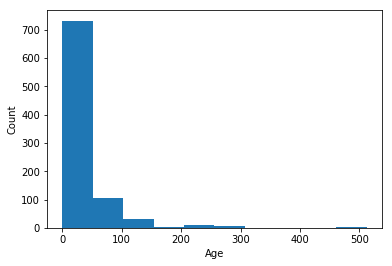

In [31]:
#The values of "Age" are discrete and there are pretty many different values, we have to figure out a way to downsize it.
#For me, I'm going to create 2 features which categorize the values of passengers' fares and ages.
#Let's have a look at the distribution of passengers' age and fare.
import matplotlib.pyplot as plt
plt.hist(train_df['Fare'])
plt.xlabel('Age')
plt.ylabel('Count')
#Most of the fares were among [0,100]

In [32]:
#Dispatch Fare into 4 parts
train_df['FareBin'] = pd.qcut(train_df['Fare'],4)
#Dispatch Age into 5 parts
train_df['AgeBin'] = pd.cut(train_df['Age'],5)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2,0,"(-0.001, 7.91]","(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,2,0,"(31.0, 512.329]","(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1,1,"(7.91, 14.454]","(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,2,0,"(31.0, 512.329]","(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,1,"(7.91, 14.454]","(32.252, 48.168]"


In [33]:
from sklearn.preprocessing import LabelEncoder
# ONE more important scientific calculation library -- sklearn!!
#LabelEncoder is defined class which can help users encode the non-digital values of the features
label_encode = LabelEncoder()
labels = ['Sex','Embarked','AgeBin','FareBin']

In [34]:
for label in labels:
    #print(label,type(label))
    new_label = label + '_Code'
    train_df[new_label] = label_encode.fit_transform(train_df[label].astype(str))
train_df.head()
#Encoding Complete

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2,0,"(-0.001, 7.91]","(16.336, 32.252]",1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1,1,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,2,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,1,"(7.91, 14.454]","(32.252, 48.168]",1,2,2,3


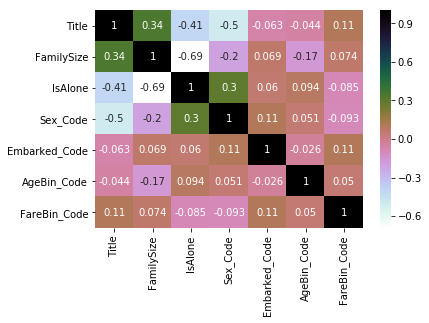

In [35]:
import seaborn as sns
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
sns.heatmap(train_df[new_feature].corr(),annot = True,cmap = 'cubehelix_r')
#We can have a look at the correlation between the new features on our own.
#In a perfect case, colinearity must be avoided.
#In the following heat map, only one figure's absolute value is equal to or above 0.5, so we may consider the data is usable.

## IMPUTATION AND CLEANING IN TEST SET

In [36]:
#Given the differnce in training set and testing set, we have to take different ways to handle missing values and big-scale discrete numbers.
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
test_df['Fare'] = train_df['Fare'].fillna(method = 'ffill')

In [38]:
missing_age_test = test_df['Age'].isnull()
s_test = test_df['Age'].value_counts(normalize = True)
test_df.loc[missing_age_test,'Age'] = np.random.choice(s_test.index,size = len(test_df[missing_age_test]),p = s_test.values)

In [39]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.',expand = False)
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [40]:
test_df['Title'] = test_df['Title'].replace(['Col','Dona','Dr','Rev'],'Rare')
test_df['Title'] = test_df['Title'].replace('Ms','Miss')
test_df.Title.unique()
#避免过度拟合

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [41]:
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

In [42]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = 1
test_df['IsAlone'].loc[test_df['FamilySize'] > 1] = 0

In [43]:
test_df['FareBin'] = pd.qcut(test_df['Fare'],4)

In [44]:
test_df['AgeBin'] = pd.cut(test_df['Age'],5)

In [45]:
for label in labels:
    new_label = label + '_Code'
    test_df[new_label] = label_encode.fit_transform(test_df[label])

# Chapter 3 IMPUTATION & CLEANING (II)

In [46]:
from sklearn.preprocessing import OneHotEncoder
#Unlike LabelEncoder, OneHotEncoder effectively avoids the misunderstanding of machine when it tries to match title and value.
enc = OneHotEncoder()

In [47]:
onehot_features = ['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
#These are the features we need to encode by OneHotEncoder

In [48]:
enc.fit(train_df[onehot_features])
#Encoding

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [49]:
enc.categories_
#This syntax is supposed to tell me the values after encoding in each features, but, oops, here's another bug I couldn't  handle.
#I intended to show the categories and their respective numbers we sorted, but it seems I mixed the attribute. Hope there will be somebody teach me out.

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [50]:
enc_res = enc.transform(train_df[onehot_features])
#Instance enc_res restores standardized one-hot codes.

In [51]:
print(enc_res.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [52]:
print(enc_res.toarray().shape)
#According to our preparation before, there should be 2 values in "Sex_code", 5 in "Titles", 3 in "Embarked_Code", 5 in "AgeBin_Code" and 4 in "FareBin_Code".
#That's the reason why 19 dimensions after encoding, because each value now has been transfromed into a single feature.
#For instance, if a tuple's second feature's value is "1", it means its title is "Mrs"; then the 1st, 3rd, 4th and 5th feature must be "0".

(891, 19)


In [53]:
original_features = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Cabin','Embarked']
new_features = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [54]:
final_features = ['Pclass','Age','SibSp','Parch','Fare','Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [55]:
#This is about to cut off the features that are hardly used or replicate.
onehot_final = list(set(final_features) - set(onehot_features))
onehot_final

['FamilySize', 'SibSp', 'IsAlone', 'Age', 'Pclass', 'Fare', 'Parch']

In [56]:
all_x = train_df[final_features]
y = train_df['Survived']
onehot_added = pd.DataFrame(enc_res.toarray())
all_x_2 = pd.concat([train_df[onehot_final],onehot_added],axis =1)
all_x_2.head()

,FamilySize,SibSp,IsAlone,Age,Pclass,Fare,Parch,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,2,1,0,22.0,3,7.2500,0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0,38.0,1,71.2833,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,26.0,3,7.9250,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1,0,35.0,1,53.1000,0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,1,35.0,3,8.0500,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### So up to now, we have two different sets of data (all_x and all_x_2), either of which is appliable to our following modelling. Both of them have advatanges and disadvantages. It needs us to balance them.
### Like I said before, one-hot encoding eliminated the mislearning. However, it increases the complexity of data, which as a consequence requires more calculation and takes more time to accomplish modeling and predicting.

In [57]:
all_x.isnull().sum()
#Final Check: no missing values now!

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title            0
FamilySize       0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(all_x,y,test_size = 0.2,random_state = 0)
#Although our project has provided us with training data and testing data, we still need to split apart traning set to pre-test.
#This is normal way to help increase the accuracy rate in the real test.

In [59]:
yTest.mean(),yTrain.mean()
#As the mean values show, this spliting is reasonable and acceptable because means are similar.

(0.3854748603351955, 0.38342696629213485)

In [60]:
x2Train,x2Test,y2Train,y2Test = train_test_split(all_x_2,y,test_size = 0.2,random_state = 0)
#Same as what I did to all_x

# Chapter 4 MODEL SELECTION
### After all the above preparation I've done before, it's time to build a model which is able to predict whether a passenger survived or not given his/her data. 
### Actually most problems require us to try as many algorithms and modeling methods as possible until eventually the most fitting model is found out. Now we are going to try logistic regression, decision tree classifier and random forest classifier, figuring out which of the three is the most suitable one.

In [61]:
#This time I tries to apply three modeling methods and we will see which one has the best performance.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
logr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
#Remember to instantiate because what we imports aren't initiated yet.
models = [logr,dtree,rf]
#Restore the three instances in a list so that we can check their degree of fitting by recursion.

In [63]:
logr.fit(xTrain,yTrain)
#Function fit0 starts the learning and the following outcome includes a variety of parameters.
#class_wight stands for a penalty for the deviations between the real values and the predicting outputs.
#random_state stands for a state of the data ehich reamins unchanged even if the data is leanred more than once

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
y_pred_test = logr.predict(xTest)
y_pred_train = logr.predict(xTrain)
#Predict the survival result according to the trained models.

In [65]:
y_pred_test.shape,yTest.shape
#It appears that the sale of y_pred_test is the same as that of yTest.

((179,), (179,))

In [66]:
np.mean(y_pred_train == yTrain)# the accuracy rate of training set

0.8202247191011236

In [67]:
np.mean(y_pred_test == yTest)# the accuracy rate of testing set

0.776536312849162

In [68]:
for model in models:#Recursion
    print("\nThe current model is",model)
    model.fit(xTrain,yTrain)
    print("Training Accuracy is ",np.mean(model.predict(xTrain) == yTrain))
    print("Testing Accuracy is ",np.mean(model.predict(xTest) == yTest))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Accuracy is  0.8202247191011236
Testing Accuracy is  0.776536312849162

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Training Accuracy is  0.9887640449438202
Testing Accuracy is  0.7988826815642458

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            

In [69]:
for model in models:
    print("\nThe current model is",model)
    model.fit(x2Train,y2Train)
    print("Training Accuracy is ",np.mean(model.predict(x2Train) == y2Train))
    print("Testing Accuracy is ",np.mean(model.predict(x2Test) == y2Test))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Accuracy is  0.8356741573033708
Testing Accuracy is  0.8156424581005587

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Training Accuracy is  0.9887640449438202
Testing Accuracy is  0.7262569832402235

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           

### From the results above, it seems Random Forest Classifier is the most suitable model because
### 1. the training accuracy is high enough, though it's still a little lower than that of Decision Tree Classifier;
### 2. the testing accuracy is acceptable while that of Decision Tree Classifier is too unconvincing. Probably there's the result of overfitting.

### Granted that the Decision Tree Classifier seems to be the best model, the assumptions of this conclusion is far from adequate, since we have just modelled once. Perhaps when we select another susbet from the data for the machine to learn and the respective counter-subset to test,  the accuracies will be dramatically different.
### So at this time it's necessary to introduce cross-chekcing to avoid biases.

## Cross Verification

In [70]:
from sklearn.model_selection import KFold
#KFold can strongly help us to code a function that is appliable to this projecy at this stage.

In [71]:
# Definition of the cross-verifying function
def CVKFold(k,X,y,Model):
    np.random.seed(1)
    #reproducibility
    
    train_accuracy = [0 for i in range(k)]
    test_accuracy = [0 for i in range(k)]
    #accuracy scores
    
    idx = 0
    #index
    
    kf = KFold(n_splits = k,shuffle =True)
    #CV loop
    
    for train_index,test_index in kf.split(X):#generation of the sets
    #generate the sets    
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        
        if Model == 'Logit':
            clf = LogisticRegression(random_state = 0)
        if Model == 'DTree':
            clf = DecisionTreeClassifier(random_state = 0)
        if Model == 'RForest':
            clf = RandomForestClassifier(random_state = 0)
    
        #model fitting
        clf = clf.fit(X_train,y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
    
        train_accuracy[idx] = np.mean(y_train_pred == y_train)
        test_accuracy[idx] = np.mean(y_test_pred == y_test)
        idx += 1
    
    print(train_accuracy)
    print(test_accuracy)
    return train_accuracy,test_accuracy

In [72]:
train_acc,test_acc = CVKFold(10,all_x,y,'Logit')
#Hre's an application:the accuracies of training sets and testing sets if the data is split into 10 parts and aplly Logistic Regression to prediction.

[0.8139825218476904, 0.8067331670822943, 0.816708229426434, 0.8129675810473815, 0.8067331670822943, 0.8079800498753117, 0.7992518703241895, 0.8117206982543641, 0.8092269326683291, 0.8067331670822943]
[0.7666666666666667, 0.8089887640449438, 0.7752808988764045, 0.7640449438202247, 0.8314606741573034, 0.8202247191011236, 0.898876404494382, 0.7865168539325843, 0.8202247191011236, 0.7865168539325843]


In [73]:
np.mean(train_acc),np.mean(test_acc)
#And now we have 

(0.8092037384690582, 0.8058801498127341)

In [74]:
train_acc,test_acc = CVKFold(10,all_x_2,y,'RForest')

[0.9675405742821473, 0.9625935162094763, 0.9763092269326683, 0.9788029925187033, 0.970074812967581, 0.972568578553616, 0.9675810473815462, 0.9738154613466334, 0.970074812967581, 0.970074812967581]
[0.7333333333333333, 0.7752808988764045, 0.7640449438202247, 0.7752808988764045, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8089887640449438, 0.8426966292134831, 0.8202247191011236]


# Chapter 5 WHAT DOES A FUNCTIONAL MODEL LOOK LIKE?
## Logistic Regression

In [75]:
logr.fit(xTrain,yTrain)
#C: the degree of regularization. The bigger the figure is, the stronger regularization is.
#max_iter: the maximum of iteration, constricting the times the learning runs, which as a result saves the time.
#warm_start:like an athlete is likely to warm his/her body up which is believed to bring out the best performance, when warm_start is set as True then the previously trained will be used so that time will be saved.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
logr.intercept_
#show the intercept of the linear regression line

array([1.80820071])

In [77]:
logr.coef_
#12 values in the list totally, standing for each of the twelve variables respectively

array([[-0.67908764, -0.02235066, -0.86520489, -0.60160003,  0.00384152,
         0.7359366 ,  0.34139579, -0.17390125, -1.92382532, -0.14432451,
        -0.04951938,  0.0485392 ]])

## Decision Tree

In [78]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [79]:
from sklearn import tree

In [80]:
dtree.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
#decision tree extraction
dot_data = tree.export_graphviz(dtree,max_depth = 5,out_file = None,feature_names = xTrain.columns,filled = True,rounded = True)
graph = graphviz.Source(dot_data)

NameError: name 'graphviz' is not defined

## Random Forest

In [82]:
rf_10 = RandomForestClassifier(n_estimators = 10)
#It will generate 10 trees in this forest.

In [83]:
rf_10.fit(xTrain,yTrain)
#max_depth: to modify this parameter is a way to avoid over-fitting.
#max_features: to modify this is another way to avoid over-fitting. If it's set a certain integer, then only most representative ones will be selected to learn.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
rf_5 = rf_10.estimators_[5]
#I select the no.5 tree from the forest and check its features.

In [85]:
dot_data = tree.export_graphviz(rf_5,max_depth = 5,out_file = None,feature_names = xTrain.columns,filled = True,rounded = True)

In [86]:
graph = graphviz.Source(dot_data)
graph.render('rftree')

NameError: name 'graphviz' is not defined

## AVOIDANCE OF OVER-FITTING

In [87]:
#Let's take decision tree classifier as an instance.
y_pred_train = dtree.predict(xTrain)
y_pred_test = dtree.predict(xTest)

In [88]:
np.mean(y_pred_train == yTrain),np.mean(y_pred_test == yTest)
#Here we can see there's quite a large gap between the accuracies. The cause of it is that our tree is too diversified.
#And actually many categories don't make sense unless they are applied in the training set.

(0.9887640449438202, 0.7877094972067039)

In [89]:
#Two simple ways to avoid over-fitting:
#1.cut down the maximum depth of the tree
#2.cluster more samples in a category
dtree2 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5)

In [90]:
dtree2.fit(xTrain,yTrain)
#fit again!

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
np.mean(dtree2.predict(xTrain) == yTrain),np.mean(dtree2.predict(xTest) == yTest)
# Now we can see that the huge gap is eliminated.

(0.8665730337078652, 0.8212290502793296)

# CHAPTER 6 OPTIMIZATION OF THE MODELS

### In the last chapter, we've learned that how to build a model and how to modify the parameters to get a favorable one.
### In this class, we are going to delve deeper into the operation of the parameters.We will figure out how to get an accurate model by setting suitable parameters at the end of the class.

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#GridSearchCV provides a method to traverse the whole system. It can modify the parameters in a certain range and retrain the learning machine according to the modified parameters., which is believed to find out the most accurate parameters.
#RandomizedSearchCv collect samples randomly in the space. This is a pretty independent method and won't suuffer an efficiency loss when parameters added.
# Strongly recommend RandomSearchCV

In [93]:
param_grid = {
    'max_depth':[7,10,13,15,17],
    'max_features':[5,7,10],
    'min_samples_split':[2,5,10],
    'n_estimators':[10,20,50]
}
#This dictionary will be used in the following calling. Make sure not to mix up the spelling and cases.

In [94]:
rf = RandomForestClassifier()

In [95]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 50, cv =3)
#This instance is used to modify the parameters of rf.
#We have 5*3*3*3=135 combinations in total, and going to recurse 50 times to find out the best one.

In [96]:
rf_random.fit(xTrain,yTrain)
#apply the method from RandomizedSearchCV to function fitting

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [99]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv =3)
#Similar to rf_random, this is also used to modify the parameters of rf.
#The difference is it searches variables according to the grid.
#You may notice that the parameter n_iter is left, this is because GridSearchCV will calculate all the possibilities in order to the optimal, so iteration is not in need (actually it's not allowed in this fit() function)

In [100]:
rf_grid.fit(xTrain,yTrain)
#Usually this function takes more time to finish than rf_random.fit(). 
#This is due to it considers more possibilities than its counterpart.(135 vs. 50)
#But less time used won't lower the accuracy. And that's a buge advantage of RandomizedSearchCV method.

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Let's check the paramters provided respectively by the two methods.

In [101]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### And here's the accuracy of prediction of the best trained learning machine

In [103]:
rf_random.best_score_

0.8370786516853933

In [104]:
rf_grid.best_score_

0.827247191011236

### The latter value is smaller than the former, which is caused by the dataset they collected for learning and predicting.
### As a matter of fact, the result of rf_grid is more accurate because it has run all the possible combinations while rf_random just selected  a par of the data randomly.

## Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
#confusion_matrix is used to evaluate the accuracy of categorization.
#Generally, there are four results in total, true positive, false positive, true negative and false negative.


In [106]:
y_pred = rf_grid.predict(xTest)
#The prediction results are restored in y_pred

In [107]:
confusion_matrix(yTest,y_pred)
#The sum of the first line is the amount of real value 1; second value 0
#The sum of the first column is the amount of predictive value 1; second value 0

array([[102,   8],
       [ 16,  53]], dtype=int64)

In [108]:
np.mean(yTest) * len(yTest)

69.0